# **PREDICTING SOCIAL HEALTH INSURANCE FUND CONTRIBUTIONS FROM KENYA’S INFORMAL SECTOR WORKERS**
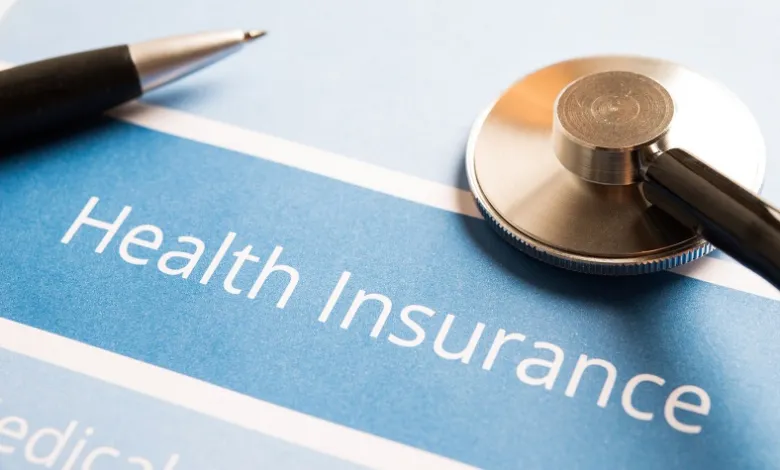

# **COLLABORATORS**
    

1. Cynthia Dalamas
2. Brian Ochieng
3. Nicole Bosibori
4. Nyakio Ruth
5. Edwin Mutendwa             

# **TABLE OF CONTENT**

1.Introduction

2.Business Understanding

3.Data Understanding

4.Problem Statement

5.Objectives

6.Metric of success

7.Preparation and Cleaning the data

8.Exploratory Data Analysis

9.Statistical Analysis

10.Data PreProcessing

11.Modelling

12.Evaluation

13.Conclusion

14.Recomendations

15.Next Steps

## **INTRODUCTION**

In 2023, the government of Kenya enacted the Social Health Insurance Act of 2023, marking a significant step towards Universal Health Coverage. This legislation ensures that all citizens can access quality healthcare services without facing catastrophic health expenses.
A critical challenge in implementing this Act lies in determining appropriate contributions from informal sector workers, who make up a substantial portion of the Kenyan workforce. Unlike formal employment with documented salaries, income in the informal sector is often variable and undocumented, complicating the process of contribution assessment. About 80% of Kenya’s population is engaged in the informal sector, and it is difficult to determine the monthly income, and by extension the SHI contributions, for this sector.
The proposed project addresses this challenge by utilizing the means test established by the Act. This means test evaluates various factors, including household demographics, location, and type of work, to determine the contribution amount for informal workers. This data collection offers a unique opportunity to develop a machine learning model capable of predicting income within the informal sector.
An accurate income prediction model can significantly improve the SHIF program. It can streamline contribution collection by determining appropriate amounts for informal workers, ensuring fairness and accuracy. The model can also identify low-income households within the informal sector, enabling targeted social programs that support the most vulnerable. Furthermore, data insights from the model can inform policy decisions that directly impact informal workers and the overall SHIF program, making the system more responsive and efficient.
.



## **STAKEHOLDERS**

1. Informal Sector Workers: Beneficiaries who will receive fair and accurate contribution assessments and targeted social programs.
2. Government of Kenya: Implementers of the SHIF program who will benefit from streamlined contribution collection and informed policy decisions.

## **BUSINESS UNDERSTANDING**

This initiative is not just a solitary fund but a constellation of funds, each with a specific purpose. Understanding the structure and components of SHIF is crucial to grasp its potential impact on healthcare in Kenya.
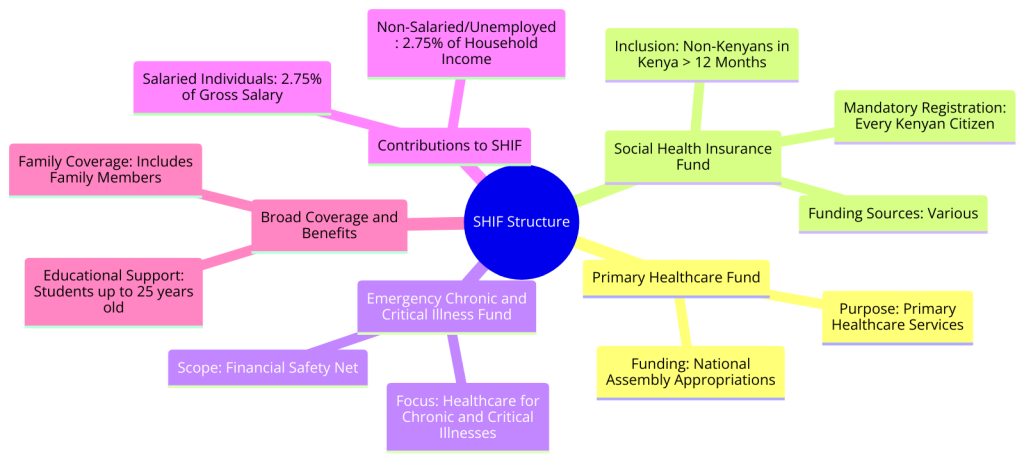







Through this structure we can determine  appropriate contributions for informal sector workers is challenging due to the variable and undocumented nature of their income. This project aims to develop a machine learning model to predict the income of informal sector workers, ensuring accurate and fair contributions to the Social Health Insurance Fund (SHIF).

What is the problem being tackled(Issue)

 improved primary healthcare services, comprehensive social health insurance coverage, and dedicated provisions for managing chronic illnesses and emergencies.
  
 What problem are we tring to solve(Relevance)

 1.With SHIF, employees gain access to broader healthcare coverage. This can be a positive aspect for businesses, potentially leading to improved health and well-being of their workforce, reduced absenteeism, and enhanced productivity.



## **DATA UNDERSTANDING**


The project aims to use publicly available data from the Kenya National Bureau of Statistics (KNBS), specifically the Kenya - Kenya Demographic and Health Survey 2022. KNBS collects data on household indicators from various regions in Kenya. Some of the variables include:**

    • House Structure: Type and quality of housing.
    
    • Sources of Water: Accessibility and types of water sources.
    
    • Incomes: Documented and estimated income levels.
    
    • Urban or Rural: Classification of the area as urban or rural.


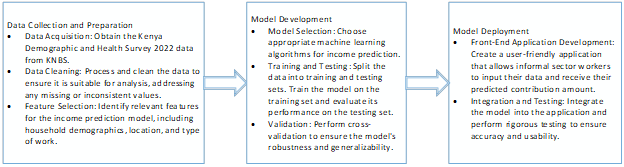



## **PROBLEM STATEMENT**

The informal sector is a significant contributor to the Kenyan economy, yet informal workers often face challenges accessing social security benefits due to the undocumented and variable nature of their income. This presents a critical barrier to achieving Universal Health Coverage (UHC) through the Social Health Insurance Fund (SHIF). Here's why predicting income for informal workers is a crucial problem to address:

1. Fair and Equitable Contributions: An accurate income prediction model ensures fair contribution assessments for informal workers to the SHIF. Without such a model, some workers might be under- or over-charged, hindering the program's financial sustainability and fairness.
    
2. Improved Program Efficiency: Streamlining contribution collection through a reliable model reduces administrative burdens, allowing the SHIF to focus on core functions like healthcare provision.
    
3. Targeted Social Programs: Identifying low-income households within the informal sector enables the development of targeted social programs that directly address their needs. This improves the overall impact of social safety nets.
    
4. Data-Driven Policy Decisions: Insights from the model can inform policy changes that better support informal workers and optimize the SHIF program. This promotes a more responsive and effective social security system.

## **OBJECTIVES**

1.	Develop a model to predict the income of informal sector workers based on data from the means test, including household demographics, location, and type of work
2.	Develop a model to classify low-income households within the informal sector, facilitating the development of targeted social programs that directly address their needs.
3.	Create an easy-to-use application that allows informal sector workers to determine their required contributions to the SHIF based on the income prediction model.
4.	Utilize insights from the model to inform and support policy decisions, ensuring that SHIF contributions are fair and equitable for all informal sector workers.


## **METRICS OF SUCCESS**

1. R-squared: This metric will be used to measures the proportion of the variance in the income of informal sector workers that is predictable from the means test data, including household demographics, location, and type of work.
2. 	F1 Score: This metric will be used to evaluate the balance between precision and recall in classifying low-income households within the informal sector, ensuring targeted social programs are accurately directed
3. User Satisfaction Score: This metric will gauge the ease of use of the application to determine their SHIF contribution
4. Policy Impact Assessment: This metric will evaluate how effectively the model's insights support policy decisions.


## **DATA PREPARATION**📥

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import kruskal

In [2]:
#read csv files
data=pd.read_csv('Dataset 2.csv')
data.head()

,case identification,respondent's year of birth,respondent's current age,age in 5-year groups,region,type of place of residence,highest educational level,highest year of education,source of drinking water,time to get to water source,...,currently working,occupation,occupation (grouped),use mobile telephone for financial transactions,how much paid in last month,justifies domestic violence: refuses to cook,respondent education,partner education,respondent education.1,how much paid in last month.1
0,1 4 2,1987,34,30-34,mombasa,urban,no education,NaN,public tap/standpipe,15,...,yes,motor vehicle drivers,skilled manual,yes,NaN,no,no education,no education,informal education (madrasa/adult basic),35000
1,1 20 2,1992,30,30-34,mombasa,urban,primary,8,piped to yard/plot,on premises,...,yes,motor vehicle drivers,skilled manual,yes,10000,no,primary,primary,"secondary/""a"" level",20000
2,1 78 2,1993,28,25-29,mombasa,urban,higher,4,public tap/standpipe,20,...,yes,construction and maintenance labour/ers,unskilled manual,yes,NaN,no,university,"secondary/""a"" level",primary,100000
3,2 15 2,1995,27,25-29,mombasa,urban,no education,NaN,piped to neighbor,on premises,...,yes,motor vehicle drivers,skilled manual,yes,NaN,no,no education,no education,primary,12000
4,2 68 2,1994,28,25-29,mombasa,urban,higher,2,cart with small tank,on premises,...,yes,mechanical engineers,professional/technical/managerial,yes,NaN,no,middle level college (certificate/diploma),middle level college (certificate/diploma),middle level college (certificate/diploma),30000


In [3]:
#dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5285 entries, 0 to 5284
Data columns (total 83 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   case identification                                               5285 non-null   object
 1   respondent's year of birth                                        5285 non-null   int64 
 2   respondent's current age                                          5285 non-null   int64 
 3   age in 5-year groups                                              5285 non-null   object
 4   region                                                            5285 non-null   object
 5   type of place of residence                                        5285 non-null   object
 6   highest educational level                                         5285 non-null   object
 7   highest year of education                 

**The DataFrame contains 5285 entries and 83 columns and data types are integers and objects**

## **DATA CLEANING 🧹**

In [4]:
#Make a copy of data
df= pd.read_csv('Dataset 2.csv')

**Dropping duplicated and irrelevant columns**

In [5]:
# Drop  columns
df = df.drop(columns=[
    'highest educational level', 'highest year of education', 'time to get to water source',
    'household has: refrigerator', 'religion','ethnicity','husband/partner\'s education level',
    'education in single years', 'household has: telephone (land-line)','educational level',
    'highest year of education (at level in mv106)', 'religion.1','partner education',
    'relationship to household head.1', 'sex of household head.1', 'age of household head.1',
    'literacy.1', 'owns a mobile telephone.1', 'last 12 months use mobile telephone for financial transactions.1',
    'is respondent\'s mobile phone a smart phone.1', 'has an account in a bank or other financial institution.1',
    'use of internet.1', 'frequency of using internet last month.1', 'self reported health status.1',
    'wealth index combined.1', 'husband/partner\'s total number of years of education',
    'justifies domestic violence: refuses to cook', 'respondent education.1','how much paid in last month',
    'occupation','respondent\'s occupation','case identification','wealth index for urban/rural','husband/partner\'s occupation'
])

# Check the remaining columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5285 entries, 0 to 5284
Data columns (total 49 columns):
 #   Column                                                          Non-Null Count  Dtype 
---  ------                                                          --------------  ----- 
 0   respondent's year of birth                                      5285 non-null   int64 
 1   respondent's current age                                        5285 non-null   int64 
 2   age in 5-year groups                                            5285 non-null   object
 3   region                                                          5285 non-null   object
 4   type of place of residence                                      5285 non-null   object
 5   source of drinking water                                        5285 non-null   object
 6   type of toilet facility                                         5285 non-null   object
 7   household has: electricity                                  

**The columns were dropped due to redandancy,duplication with other columns and others had no impact on the main objective**

**Checking for duplicate rows**

In [6]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


**Checking and handling unique values in how much paid in last month**

In [7]:
# Display the count of each unique value in the column 'How Much Paid in Last Month.1'
print(df['how much paid in last month.1'].value_counts())

how much paid in last month.1
10000     454
15000     400
20000     324
5000      310
30000     285
         ... 
14400       1
44200       1
176000      1
18500       1
245000      1
Name: count, Length: 199, dtype: int64


In [8]:
# Replace non-numeric values with NaN
df['how much paid in last month.1'] = df['how much paid in last month.1'].replace(['did not work in last month', 'don\'t know'], np.nan)


**The values did not work in last month and don't know values in the column will be dropped since they are only 99**

**Covert column how much paid in last month to integer for better EDA**

In [9]:
# Convert to numeric, setting failed conversions to NaN
df['how much paid in last month.1'] = pd.to_numeric(df['how much paid in last month.1'], errors='coerce')

**Checking for missing values**

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

is respondent's mobile phone a smart phone    957
how much paid in last month.1                 753
dtype: int64

In [11]:
# Confirm missing values
missing_values = df.isnull().sum()
missing_values

respondent's year of birth                                          0
respondent's current age                                            0
age in 5-year groups                                                0
region                                                              0
type of place of residence                                          0
source of drinking water                                            0
type of toilet facility                                             0
household has: electricity                                          0
household has: radio                                                0
household has: television                                           0
household has: bicycle                                              0
household has: motorcycle/scooter                                   0
household has: car/truck                                            0
main floor material                                                 0
main wall material  

**Handling the missing values**

In [12]:
# Fill missing values in 'is respondent's mobile phone a smart phone' with mode
df['is respondent\'s mobile phone a smart phone'] = df['is respondent\'s mobile phone a smart phone'].fillna(df['is respondent\'s mobile phone a smart phone'].mode()[0])

# Impute missing income values with the median
df['how much paid in last month.1'] = df['how much paid in last month.1'].fillna(df['how much paid in last month.1'].median())


**The missing values in is respondents mobile phone a smart phone and how much paid in last month.1 were filled with mode since the number missing values were a smaller percentage of the total**

**Checking and handling the unique values in husband/partner\'s occupation**

In [13]:
# Display the unique values and their counts for 'husband/partner's occupation (grouped)'
print(df['husband/partner\'s occupation (grouped)'].value_counts())

husband/partner's occupation (grouped)
skilled manual                       1189
agricultural - employee              1121
professional/technical/managerial     943
did not work                          595
unskilled manual                      504
sales                                 327
services                              216
household and domestic                171
don't know                             92
agricultural - self employed           71
clerical                               45
.a                                     11
Name: count, dtype: int64


In [14]:
# Replace ".a" with "Unknown" in "husband/partner's occupation (grouped)"
df['husband/partner\'s occupation (grouped)'] = df['husband/partner\'s occupation (grouped)'].replace('.a', 'Unknown')

# Verify that '.a' has been dropped
print(df['husband/partner\'s occupation (grouped)'].value_counts())


husband/partner's occupation (grouped)
skilled manual                       1189
agricultural - employee              1121
professional/technical/managerial     943
did not work                          595
unskilled manual                      504
sales                                 327
services                              216
household and domestic                171
don't know                             92
agricultural - self employed           71
clerical                               45
Unknown                                11
Name: count, dtype: int64


**Drop rows where 'husband/partner's occupation (grouped)' is '.a' since they are only 11 and did not give insight to the data**

**Checking and handling the unique values 'type of cooking fuel'**

In [15]:
# Display the unique values and their counts for 'type of cooking fuel'
print(df['type of cooking fuel'].value_counts())

type of cooking fuel
wood                       3250
lpg                         955
charcoal                    887
kerosene                     70
natural gas                  41
not a dejure resident        37
electricity                  11
straw/shrubs/grass           10
biogas                        7
no food cooked in house       6
alcohol/ethanol               4
17                            4
15                            1
agricultural crop             1
solar power                   1
Name: count, dtype: int64


In [16]:
# Drop rows where 'type of cooking fuel' is '17' or '15'
df = df[~df['type of cooking fuel'].isin(['17', '15'])]

# Verify that the values have been dropped
print(df['type of cooking fuel'].value_counts())

type of cooking fuel
wood                       3250
lpg                         955
charcoal                    887
kerosene                     70
natural gas                  41
not a dejure resident        37
electricity                  11
straw/shrubs/grass           10
biogas                        7
no food cooked in house       6
alcohol/ethanol               4
agricultural crop             1
solar power                   1
Name: count, dtype: int64


**Drop rows where 'type of cooking fuel' is '17' or '15' since they have no insight on the data and are only 5**

**Checking and handling unique values and their counts for 'occupation (grouped)'**

In [17]:
# Display the unique values and their counts for 'occupation (grouped)'
occupation_grouped_counts = df['occupation (grouped)'].value_counts()

# Print the counts
print(occupation_grouped_counts)

occupation (grouped)
agriculture - employee               1437
skilled manual                       1248
professional/technical/managerial     906
unskilled manual                      555
sales                                 382
services                              197
not working                           168
agriculture - self employed           112
household and domestic                103
don't know                             96
clerical                               57
.a                                     19
Name: count, dtype: int64


In [18]:
# Replace ".a" with "Unknown" in "occupation (grouped)"
df['occupation (grouped)'] = df['occupation (grouped)'].replace('.a', 'Unknown')

# Verify that '.a' has been dropped
print(df['occupation (grouped)'].value_counts())

occupation (grouped)
agriculture - employee               1437
skilled manual                       1248
professional/technical/managerial     906
unskilled manual                      555
sales                                 382
services                              197
not working                           168
agriculture - self employed           112
household and domestic                103
don't know                             96
clerical                               57
Unknown                                19
Name: count, dtype: int64


**Drop rows where 'occupation (grouped)' is '.a' since they are only 8 and did not give insight to the data**

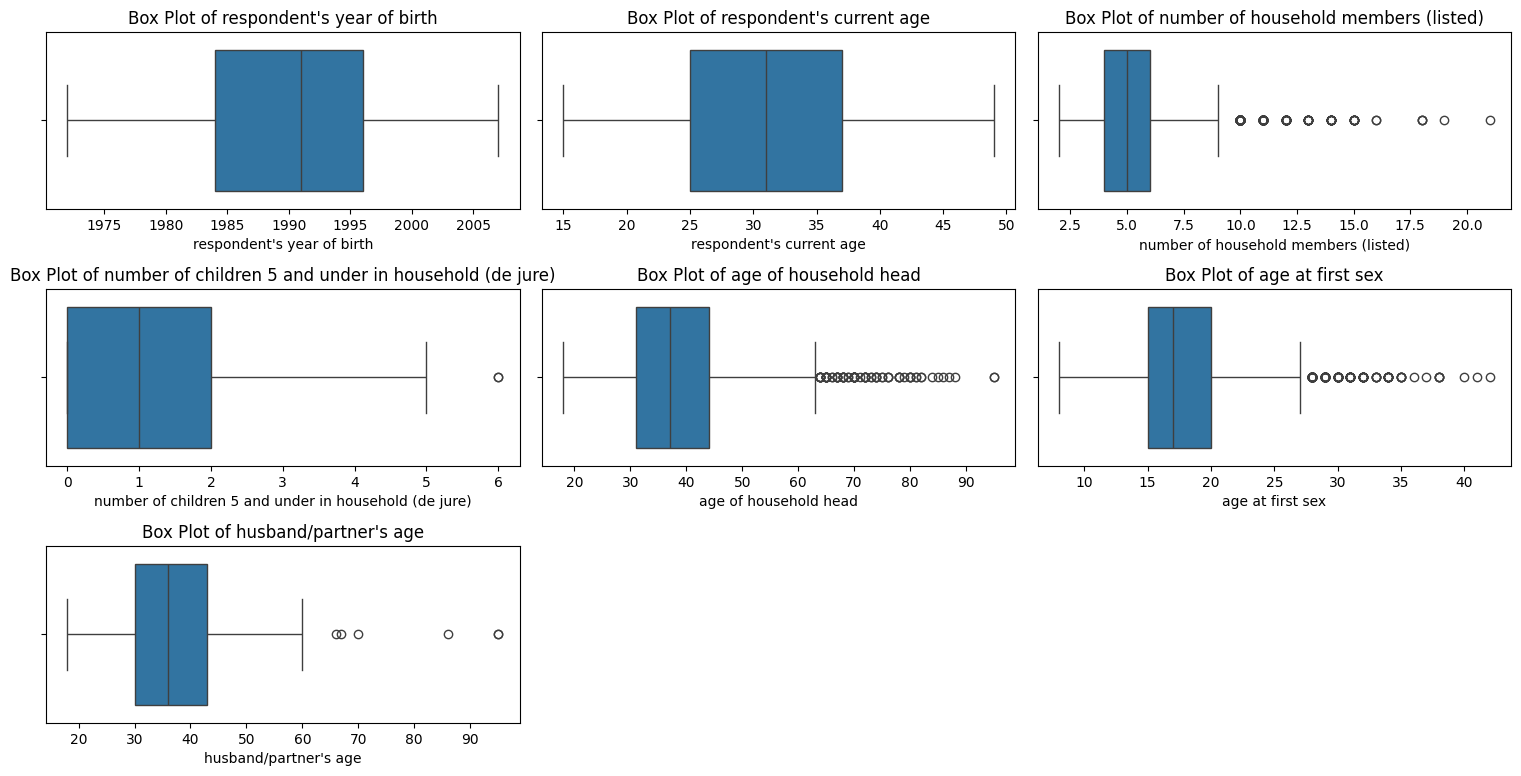

In [19]:
# Select numeric columns
numerical_columns = df.select_dtypes(include=['int64']).columns

# Plot box plots for numeric columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

**This outliers will be maintained since they give insight to the data**

#  **EXPLORATORY DATA ANALYSIS 📉**

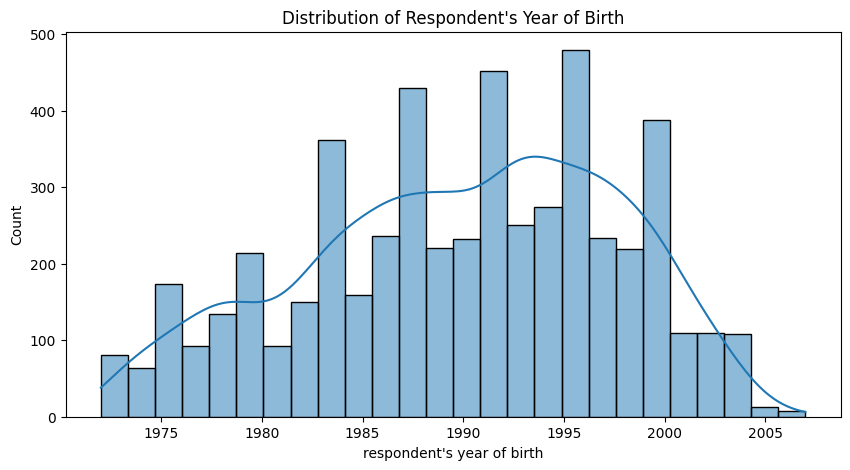

In [20]:
# Plot distribution of Respondent's Year of birth
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x= 'respondent\'s year of birth', kde=True)
plt.title('Distribution of Respondent\'s Year of Birth')
plt.show()

**Majority of the workers in the informal sector are born around 1995**

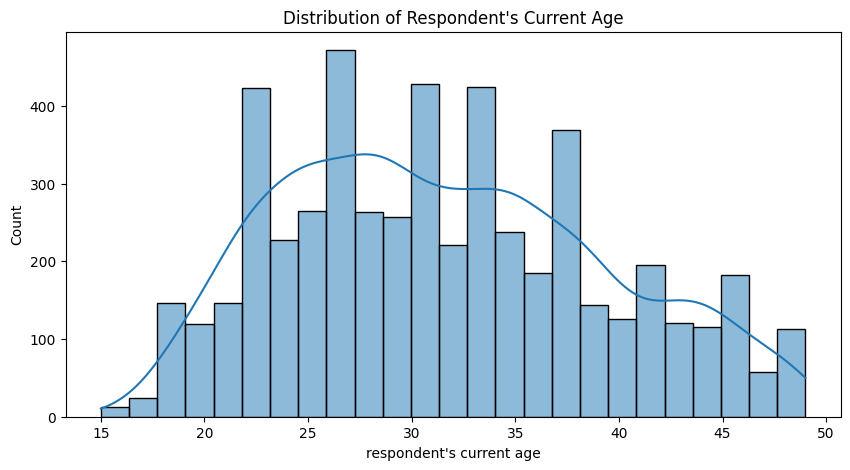

In [21]:
# Plot distribution of Respondent's Current Age
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='respondent\'s current age', kde=True)
plt.title('Distribution of Respondent\'s Current Age')
plt.show()

**Majority of the informal sector workers are around the age of 26**

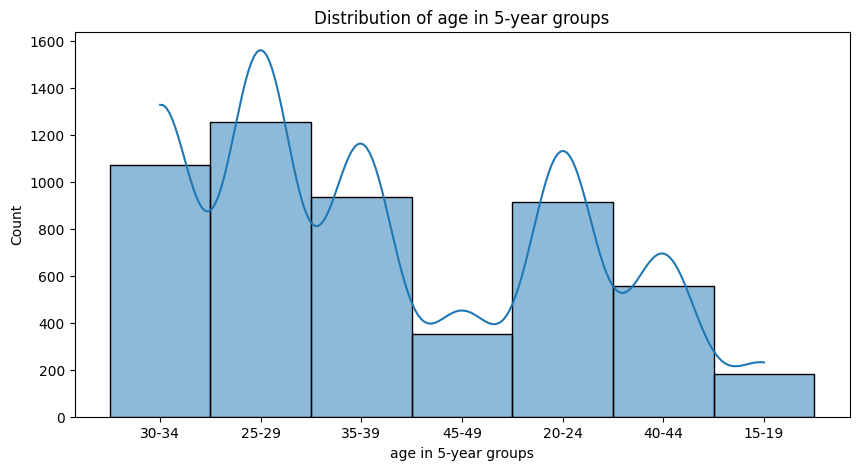

In [22]:
# Plot distribution of age in 5-year groups
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age in 5-year groups', kde=True)
plt.title('Distribution of age in 5-year groups')
plt.show()

**The largest age group in working in the informal sector is between the ages of 25 to 29 years**

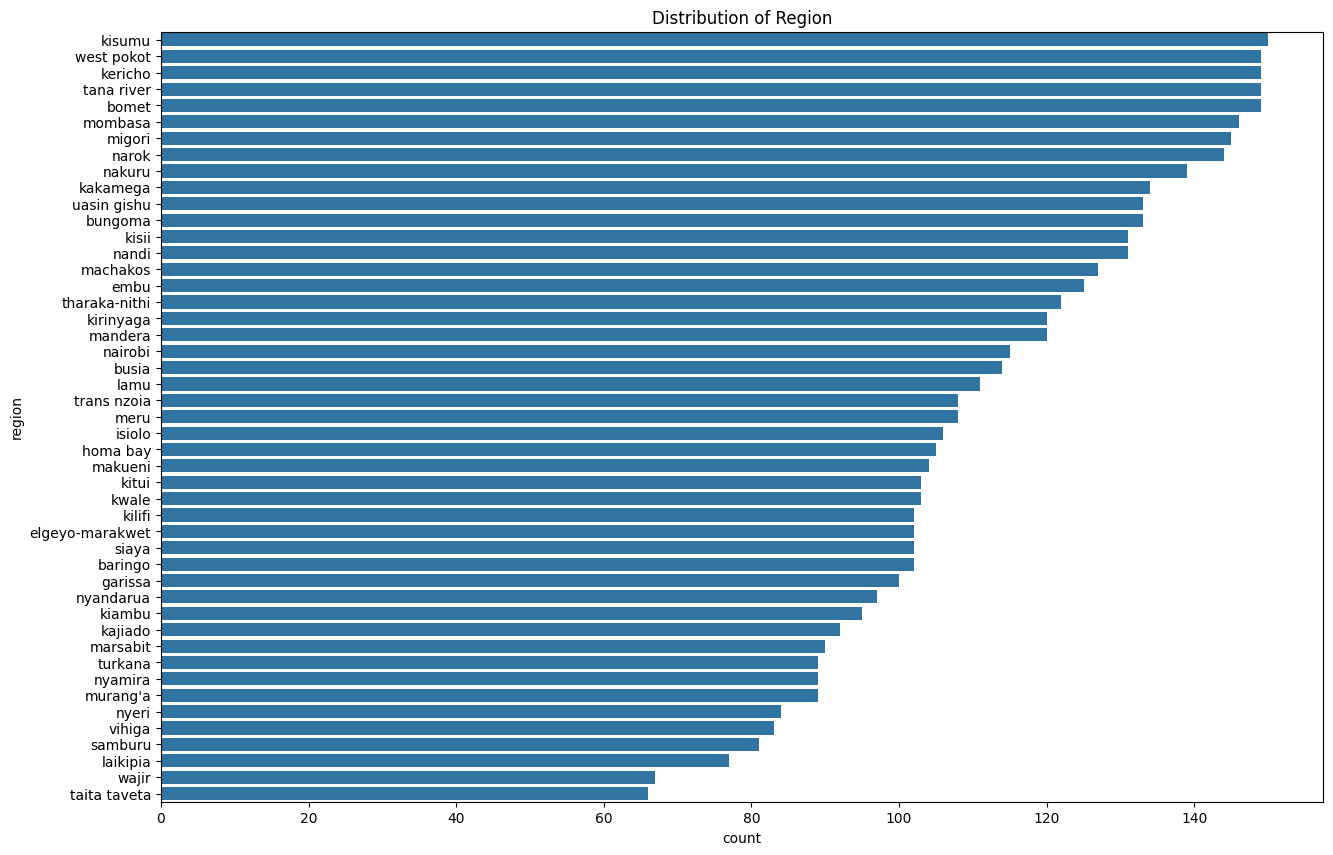

In [23]:
# Plot distribution of Region
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='region', order=df['region'].value_counts().index)
plt.title('Distribution of Region')
plt.show()

**The region that with the highest number informal sector workers is Kisumu while the least is Taita Taveta**

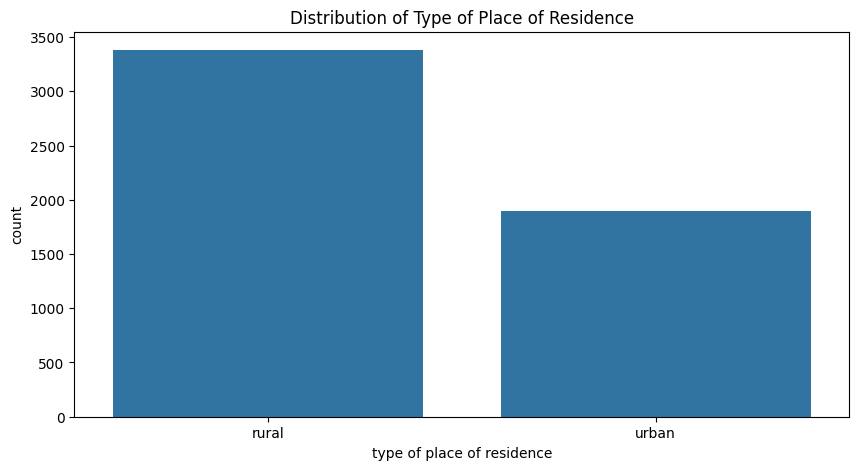

In [24]:
# Plot distribution of Type of Place of Residence
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='type of place of residence', order=df['type of place of residence'].value_counts().index)
plt.title('Distribution of Type of Place of Residence')
plt.show()

**Majority of the informal sector workers live in rural areas**

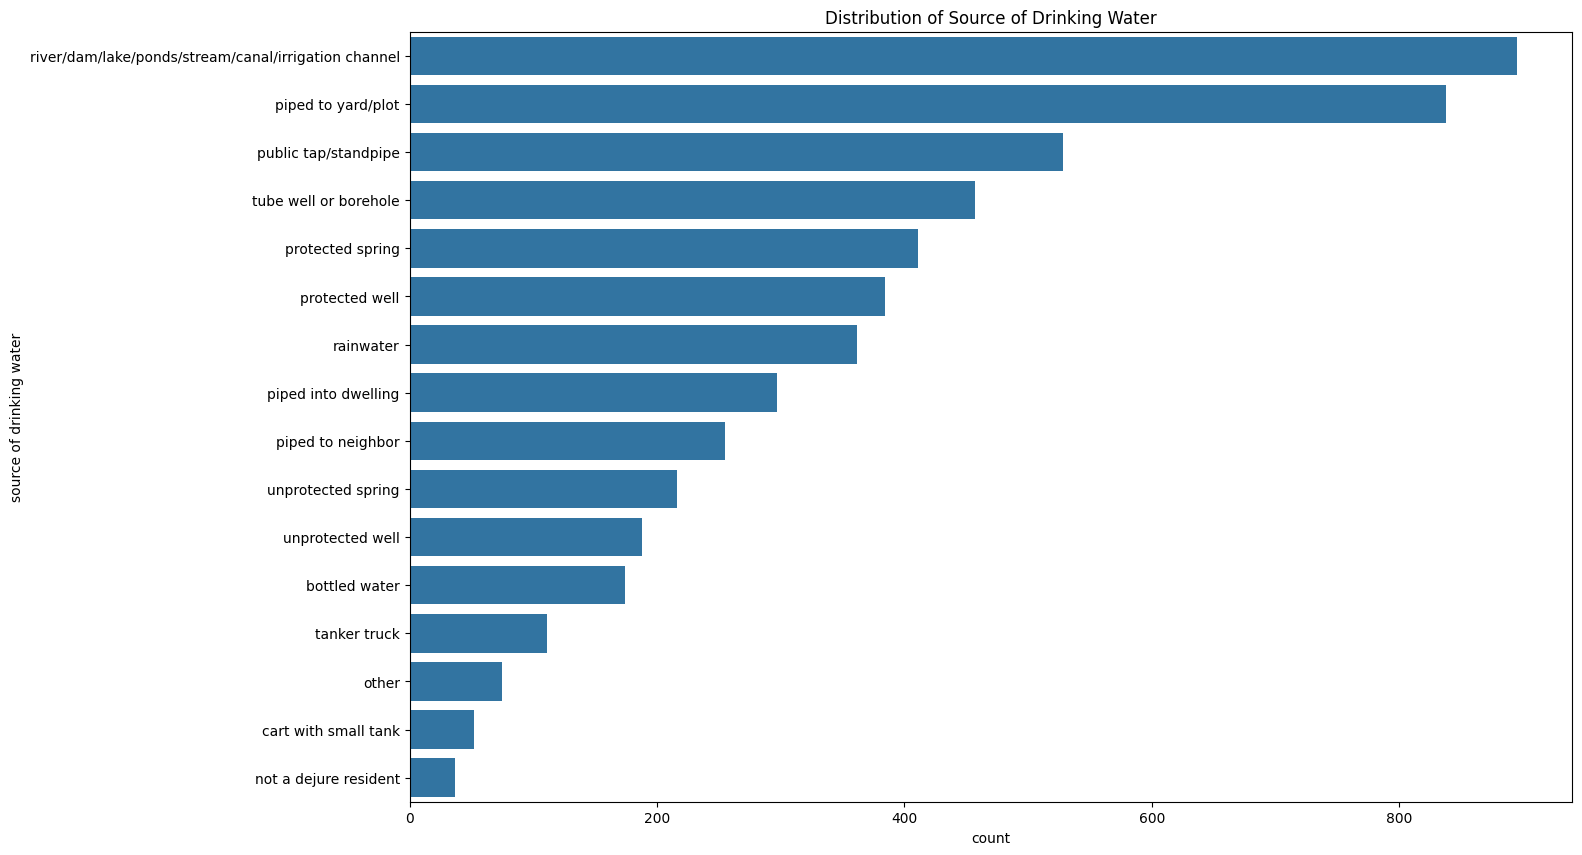

In [25]:
# Plot distribution of Source of Drinking Water
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='source of drinking water', order=df['source of drinking water'].value_counts().index)
plt.title('Distribution of Source of Drinking Water')
plt.show()

**Majority of the informal sector workers het their drinking water from the river/dam/lake/ponds/stream/Canal/irrigation chanel**

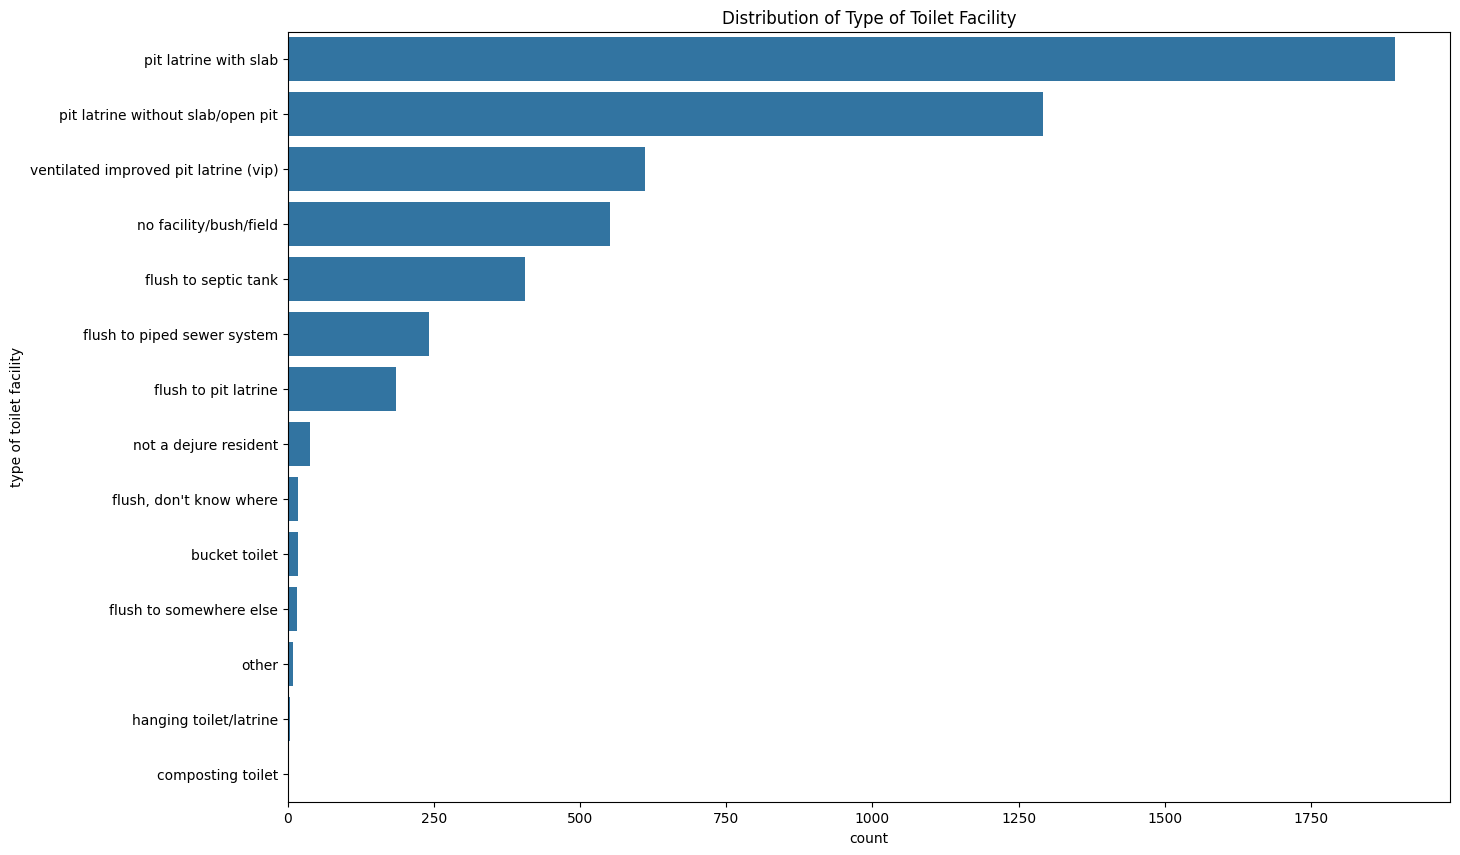

In [26]:
# Plot distribution of Type of Toilet Facility
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='type of toilet facility', order=df['type of toilet facility'].value_counts().index)
plt.title('Distribution of Type of Toilet Facility')
plt.show()

**Majority of informal sector workers use pit latrines with slabs**

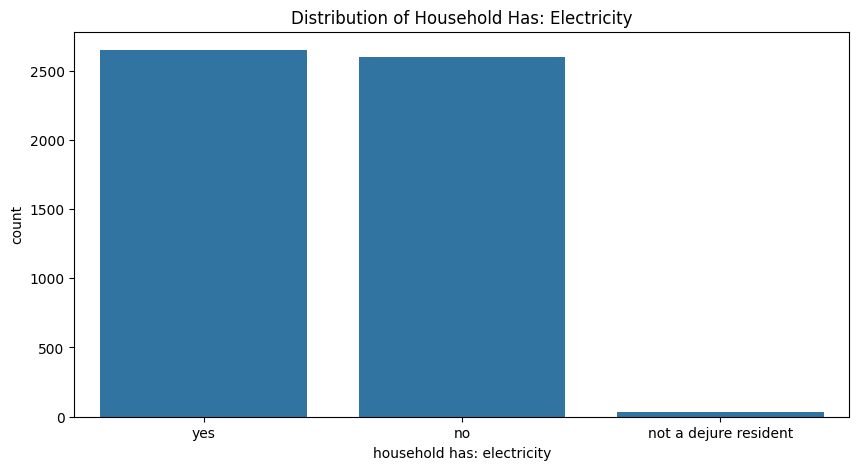

In [27]:
# Plot distribution of Household Has: Electricity
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='household has: electricity', order=df['household has: electricity'].value_counts().index)
plt.title('Distribution of Household Has: Electricity')
plt.show()

**The informal sector workers all have equal numbers of households who have electricity and those without**

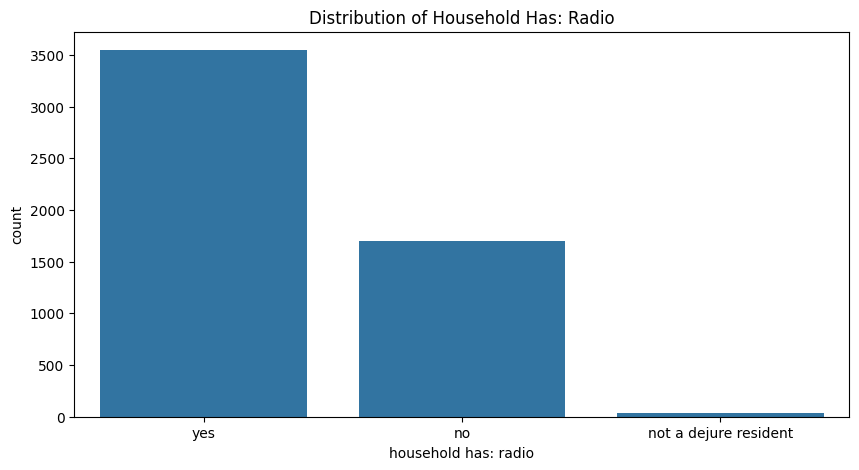

In [28]:
# Plot distribution of Household Has: Radio
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='household has: radio', order=df['household has: radio'].value_counts().index)
plt.title('Distribution of Household Has: Radio')
plt.show()

**Majority of the informal sector workers households have radios**

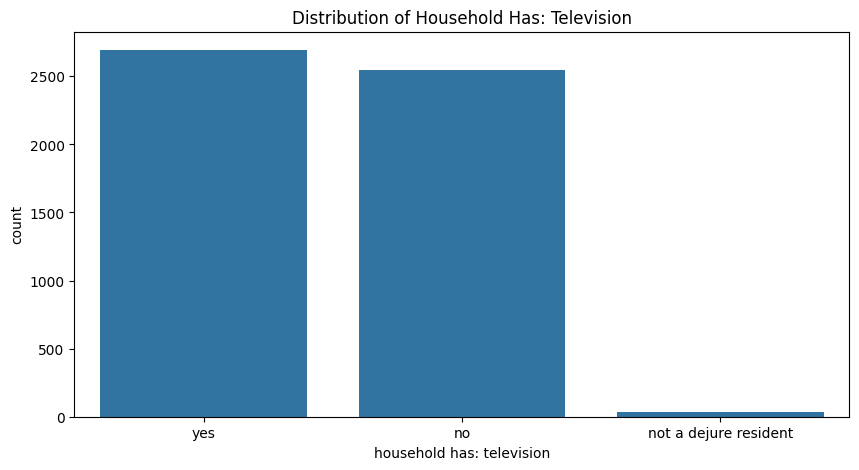

In [29]:
# Plot distribution of Household Has: television
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='household has: television', order=df['household has: television'].value_counts().index)
plt.title('Distribution of Household Has: Television')
plt.show()

**Majority of the informal sector workers households have Televisions**

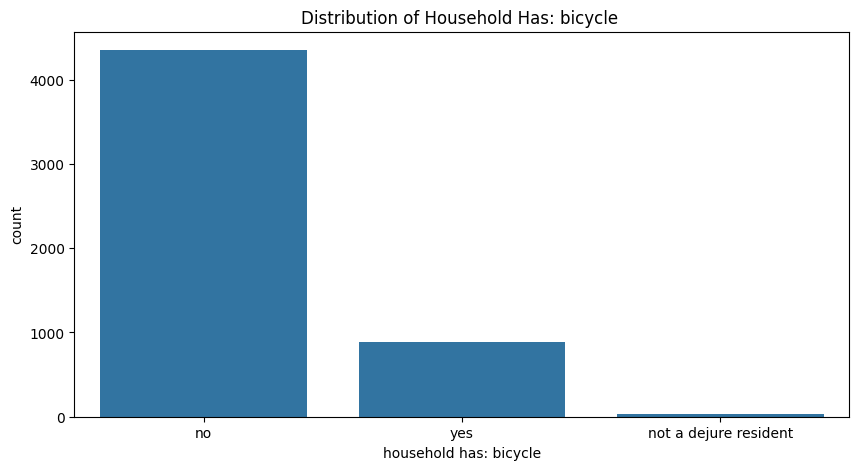

In [30]:
# Plot distribution of Household Has: bicycle
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='household has: bicycle', order=df['household has: bicycle'].value_counts().index)
plt.title('Distribution of Household Has: bicycle ')
plt.show()

**Majority of the informal sector workers households have no bicycles**

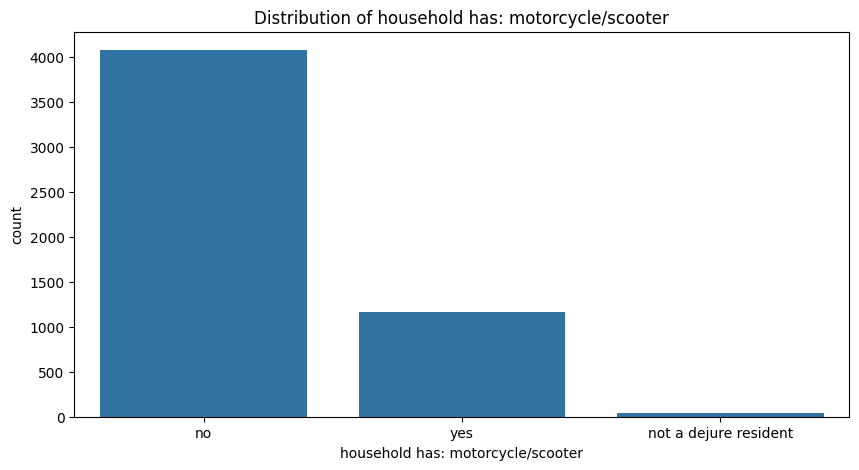

In [31]:
# Plot distribution of household has: motorcycle/scooter
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='household has: motorcycle/scooter', order=df['household has: motorcycle/scooter'].value_counts().index)
plt.title('Distribution of household has: motorcycle/scooter')
plt.show()

**Majority of the informal sector workers households have no motorcycle/scooter**

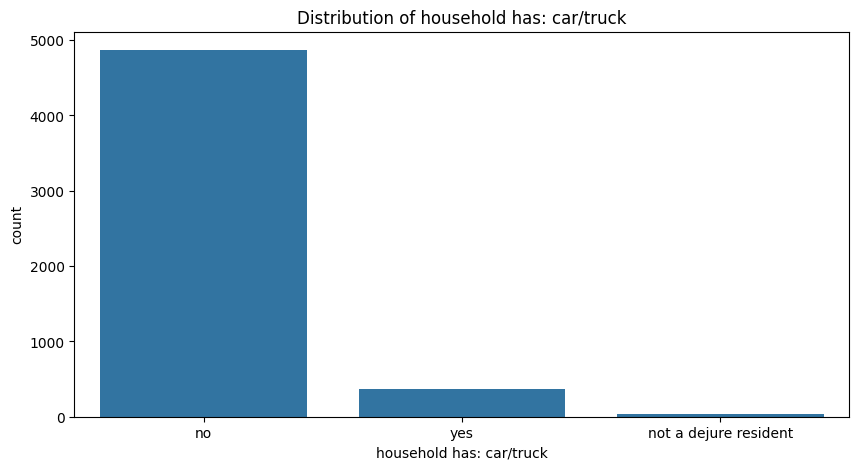

In [32]:
# Plot distribution of household has: car/truck
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='household has: car/truck', order=df['household has: car/truck'].value_counts().index)
plt.title('Distribution of household has: car/truck')
plt.show()

**Majority of the informal sector workers households have no cars/trucks**

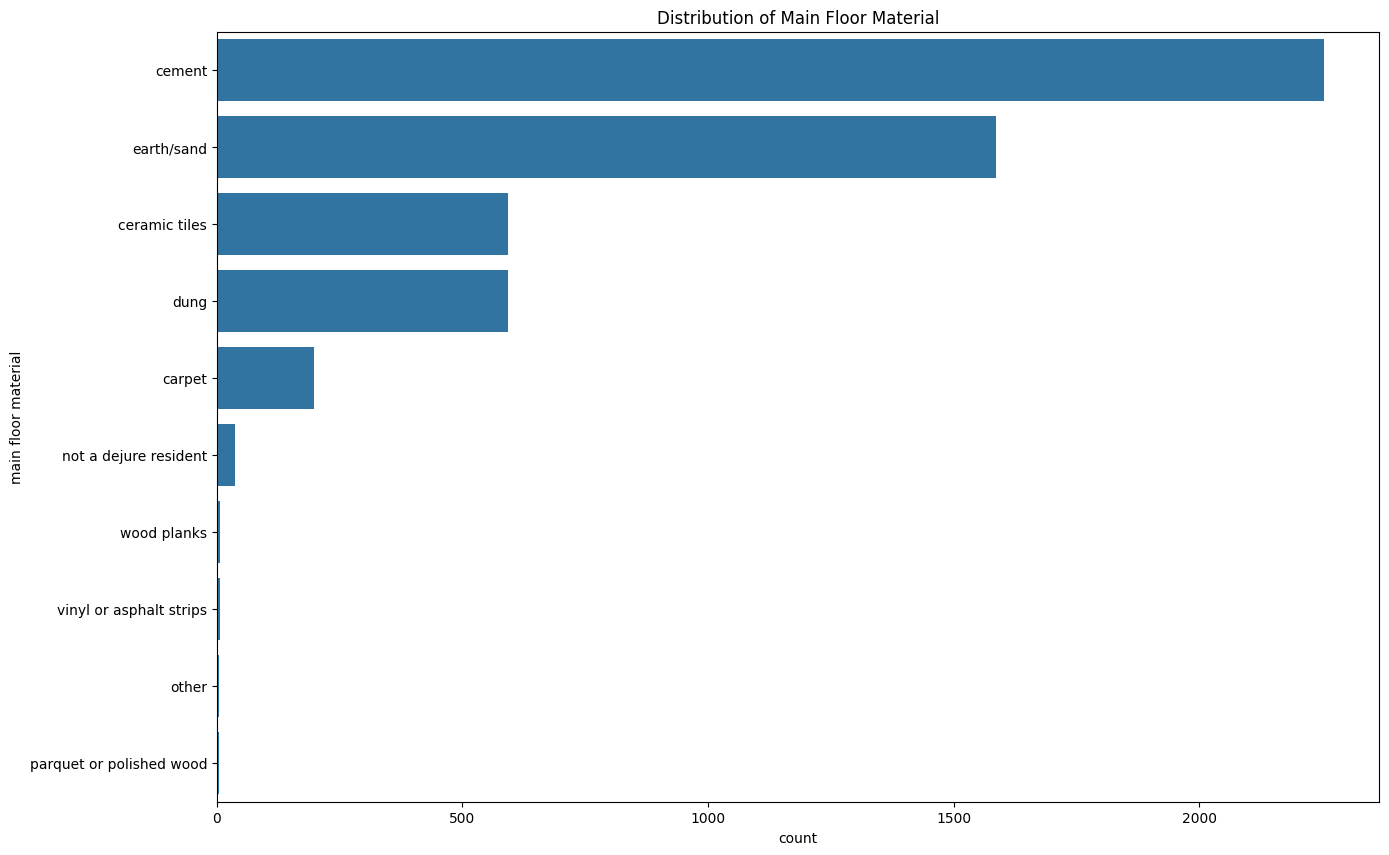

In [33]:
# Plot distribution of Main Floor Material
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='main floor material', order=df['main floor material'].value_counts().index)
plt.title('Distribution of Main Floor Material')
plt.show()

**Majority of the informal sector workers live in houses with cement floors**

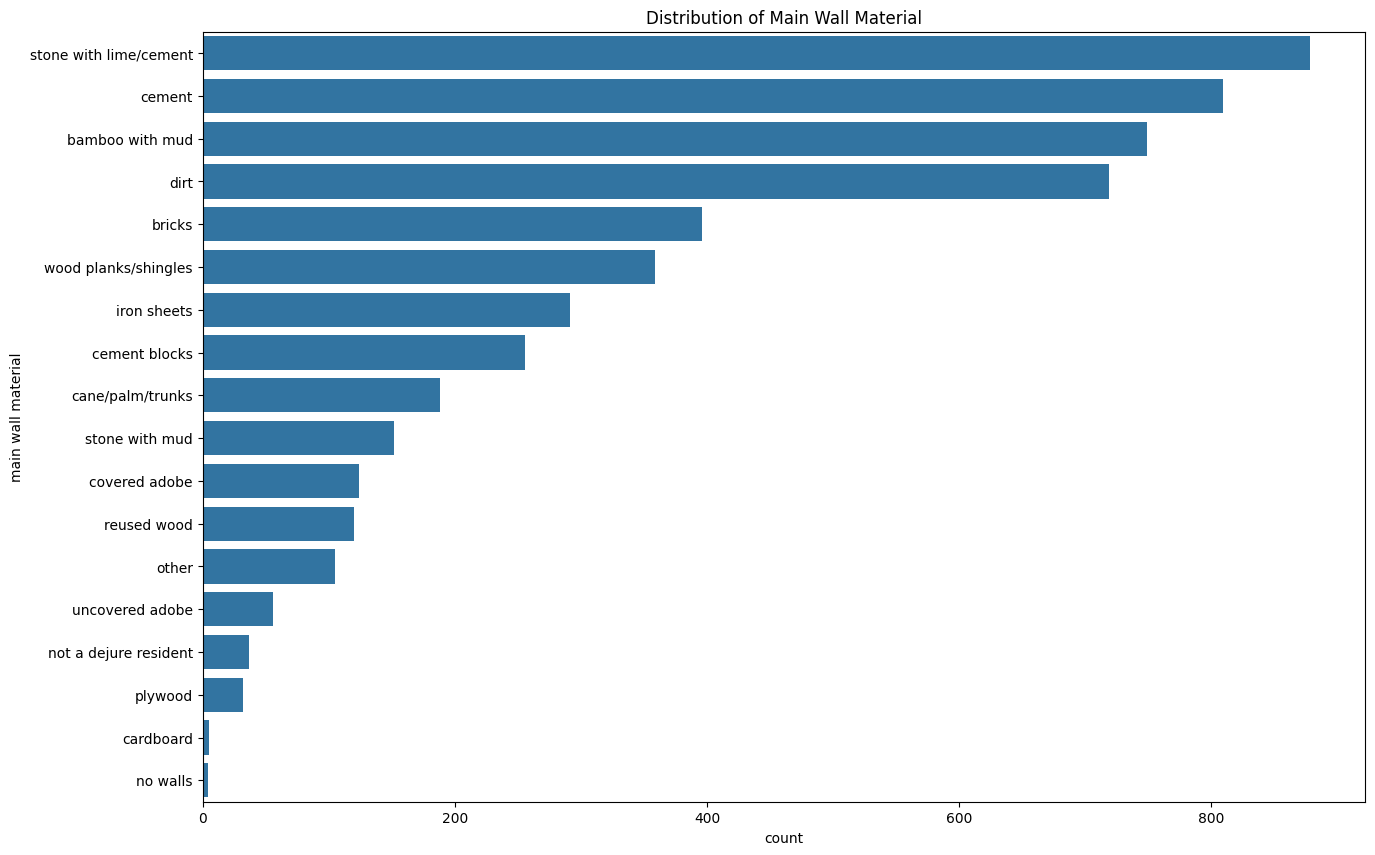

In [34]:
# Plot distribution of Main Wall Material
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='main wall material', order=df['main wall material'].value_counts().index)
plt.title('Distribution of Main Wall Material')
plt.show()

**Majority of the informal sector workers live in houses with walls made of stone with lime/cement**

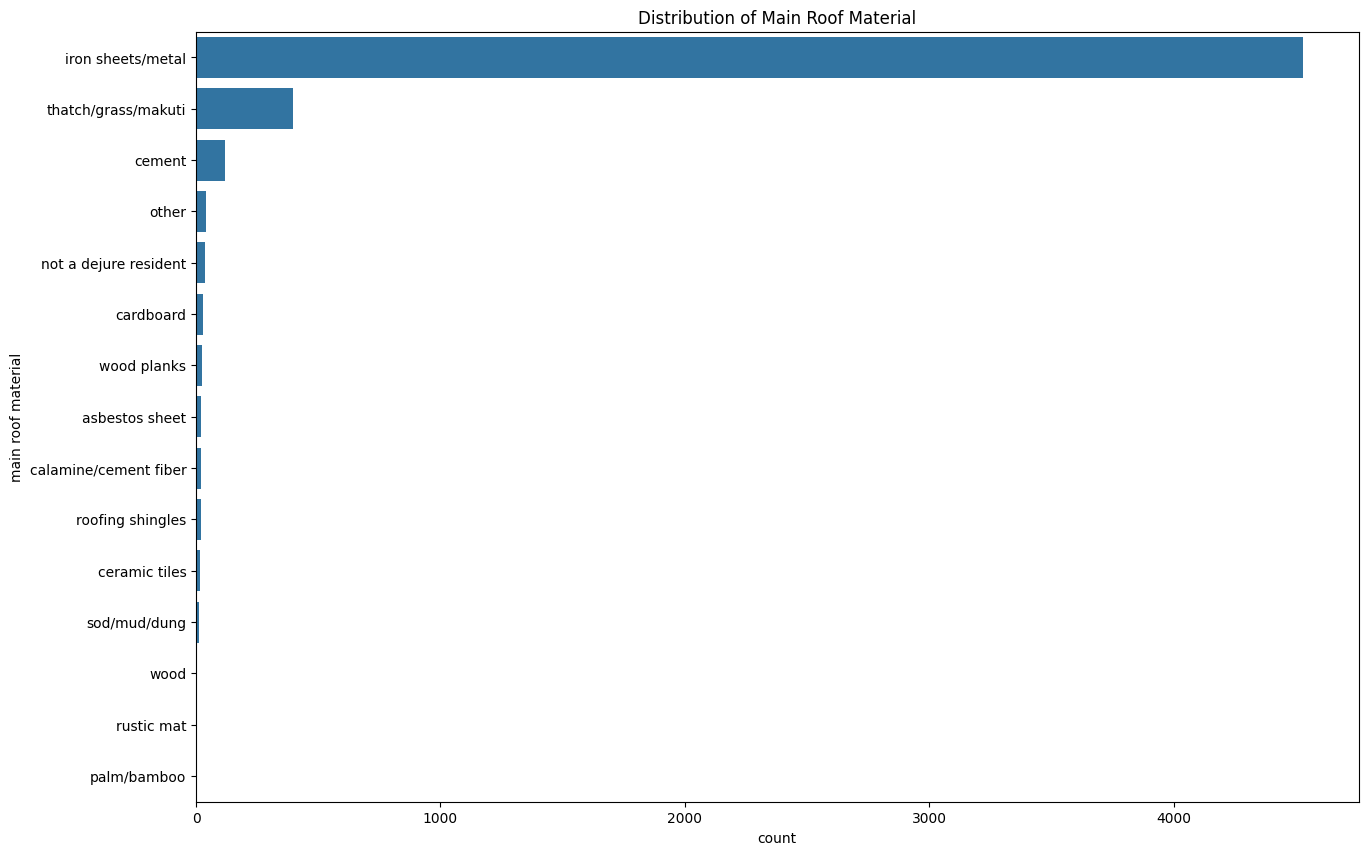

In [35]:
# Plot distribution of Main Roof Material
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='main roof material', order=df['main roof material'].value_counts().index)
plt.title('Distribution of Main Roof Material')
plt.show()

**Majority of the informal sector workers live in houses with roofs made of iron sheets/metal**

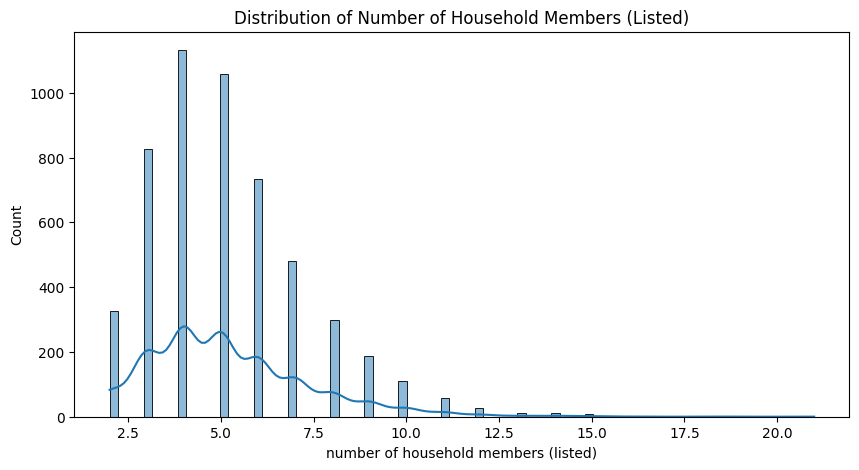

In [36]:
# Plot distribution of Number of Household Members (Listed)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='number of household members (listed)', kde=True)
plt.title('Distribution of Number of Household Members (Listed)')
plt.show()

**Majority of the households have 4 members**

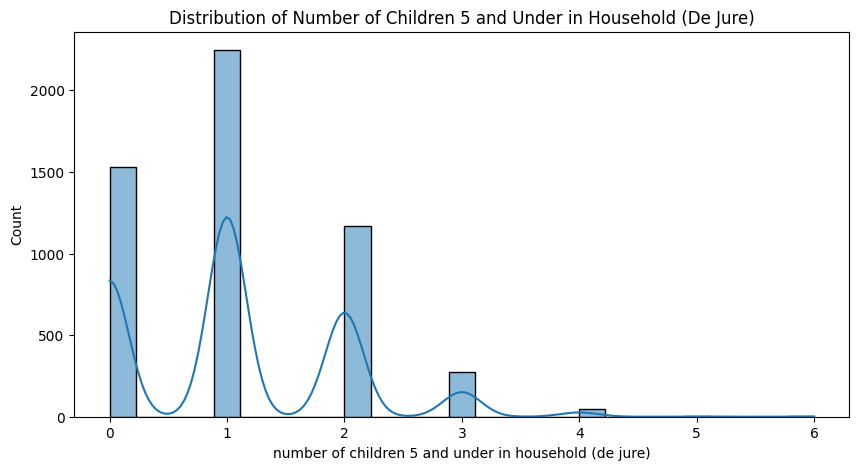

In [37]:
# Plot distribution of Number of Children 5 and Under in Household (De Jure)
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='number of children 5 and under in household (de jure)', kde=True)
plt.title('Distribution of Number of Children 5 and Under in Household (De Jure)')
plt.show()

**Majority of the households have 1 child under the age of 5 years**

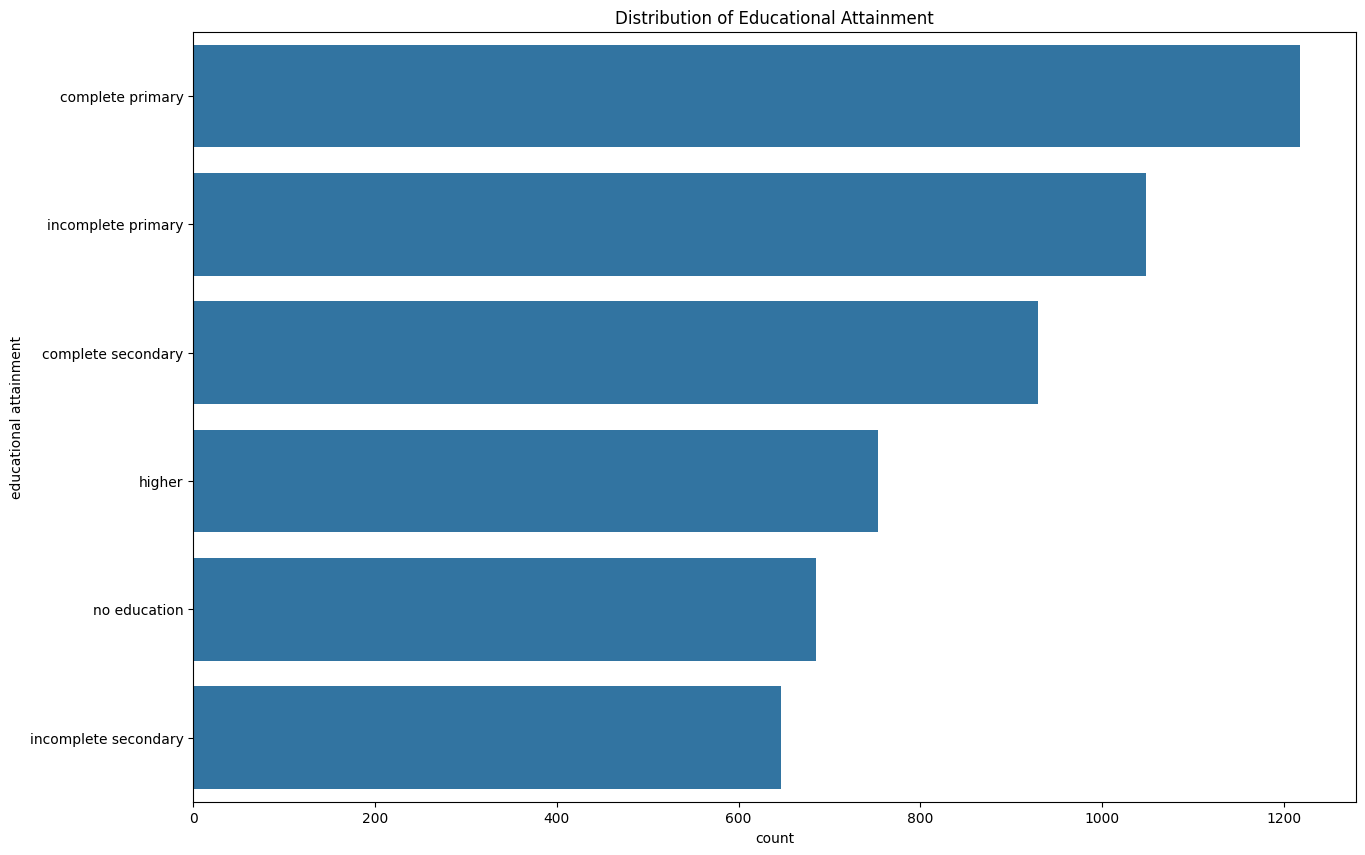

In [38]:
# Plot distribution of Educational Attainment
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='educational attainment', order=df['educational attainment'].value_counts().index)
plt.title('Distribution of Educational Attainment')
plt.show()

**Majortiy of the workers finished primary school but not highschool and the ones who finshed highschool school very few got higher education**

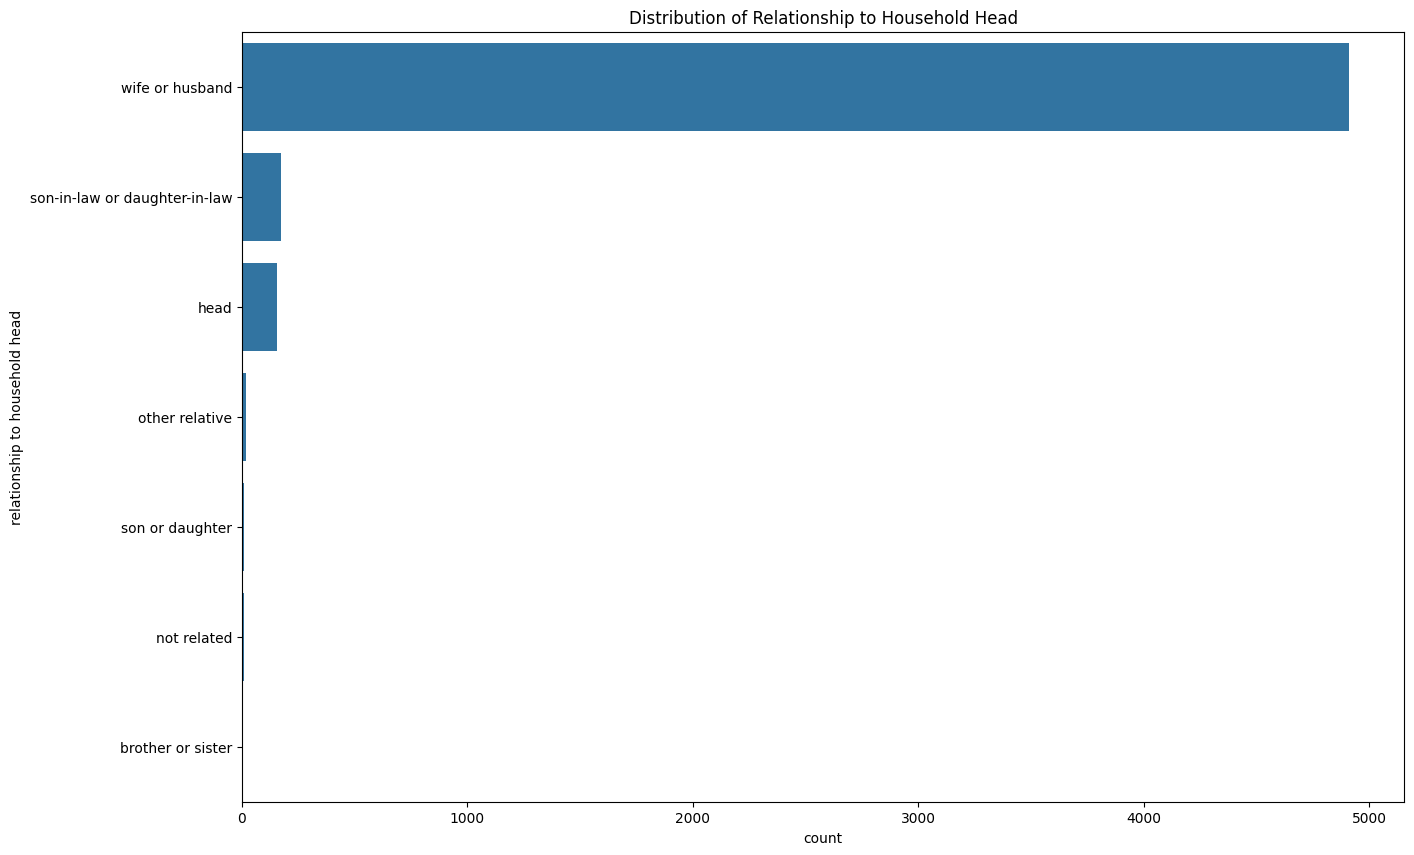

In [39]:
# Plot distribution of Relationship to Household Head
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='relationship to household head', order=df['relationship to household head'].value_counts().index)
plt.title('Distribution of Relationship to Household Head')
plt.show()

**Majority of them workers live with either their husband or wife**

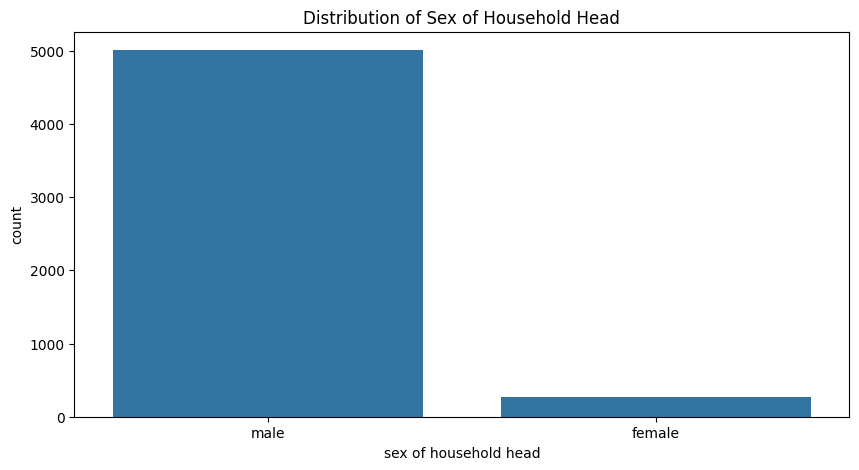

In [40]:
# Plot distribution of Sex of Household Head
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='sex of household head', order=df['sex of household head'].value_counts().index)
plt.title('Distribution of Sex of Household Head')
plt.show()

**Majority of the household heads are male**

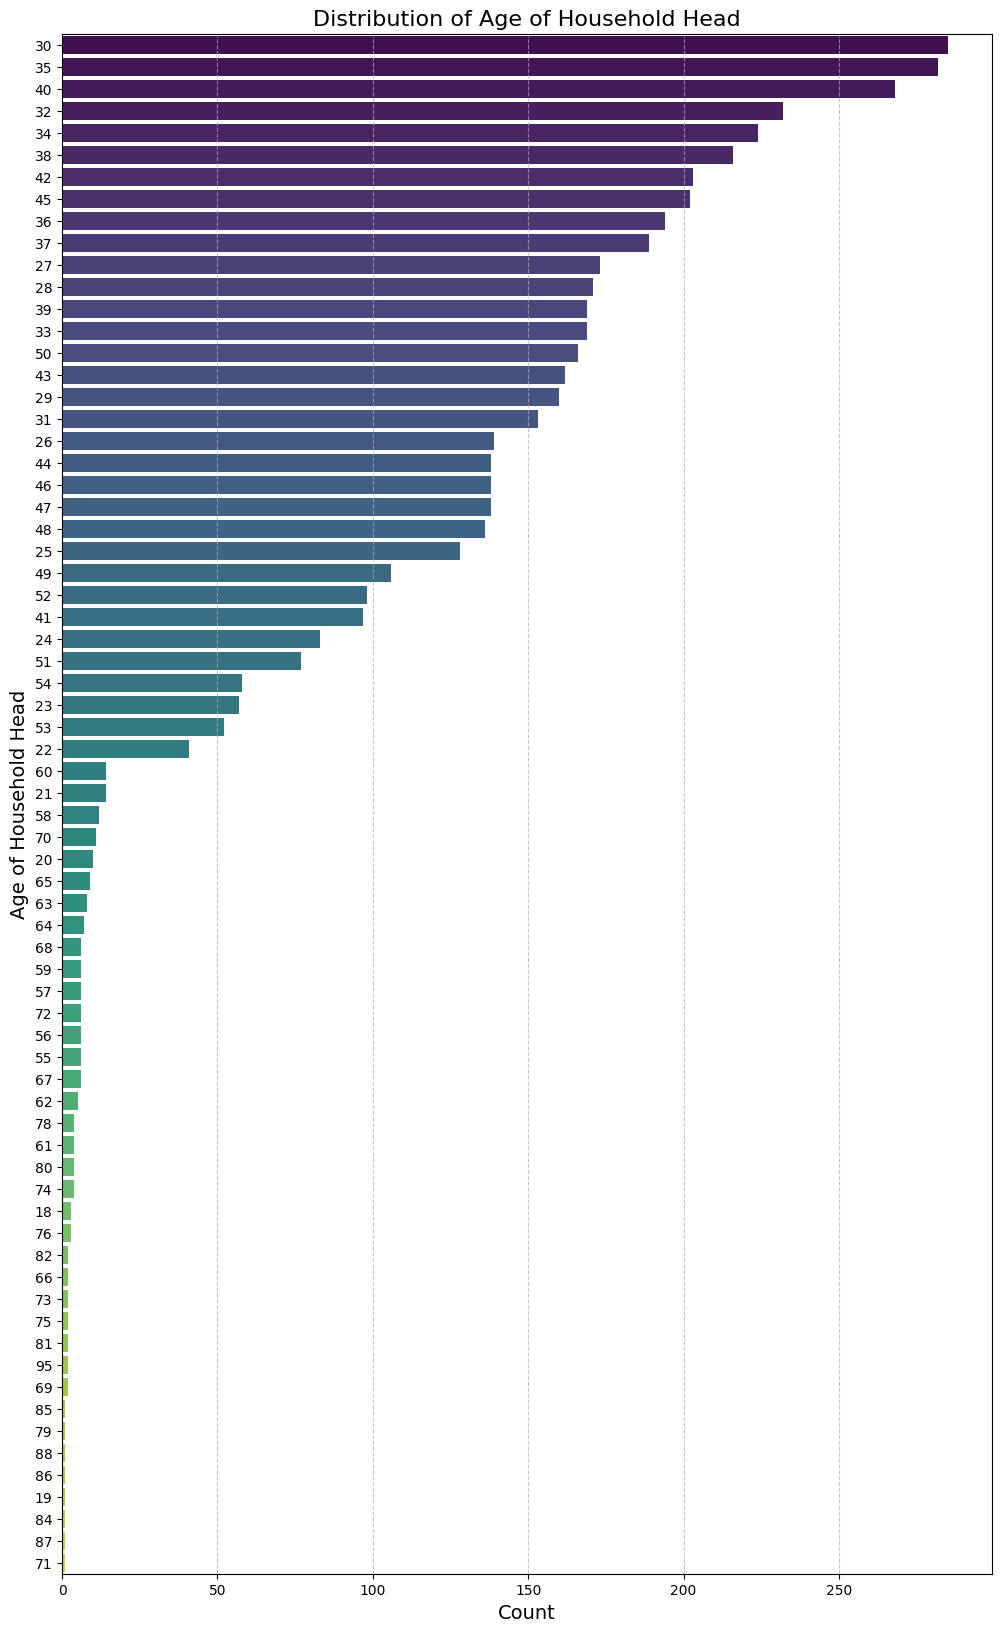

In [41]:
# Plot distribution of Age of Household Head
plt.figure(figsize=(12, 20))

# Countplot with enhanced aesthetics
sns.countplot(data=df, y='age of household head', order=df['age of household head'].value_counts().index, palette='viridis')

# Adding titles and labels
plt.title('Distribution of Age of Household Head', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Age of Household Head', fontsize=14)

# Adding gridlines for better visual reference
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

**Majority of the household heads are 33 years old**

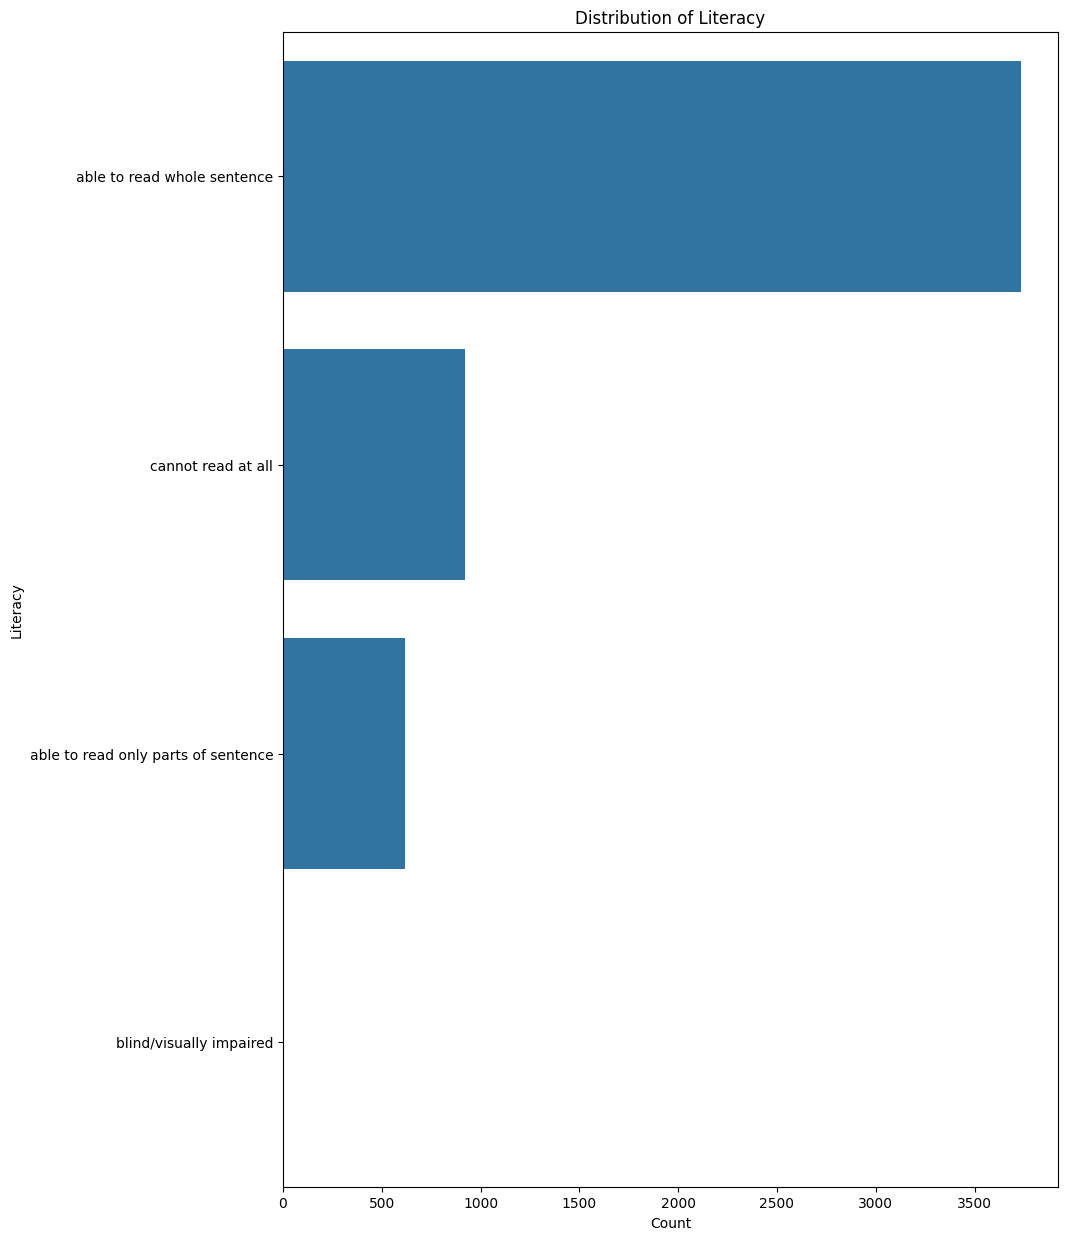

In [42]:
# Plot distribution of Literacy
plt.figure(figsize=(10, 15))
sns.countplot(data=df, y='literacy', order=df['literacy'].value_counts().index, orient='h')
plt.title('Distribution of Literacy')
plt.xlabel('Count')
plt.ylabel('Literacy')
plt.show()

**Majority of the workers can be literate as they are able to read whole sentence**

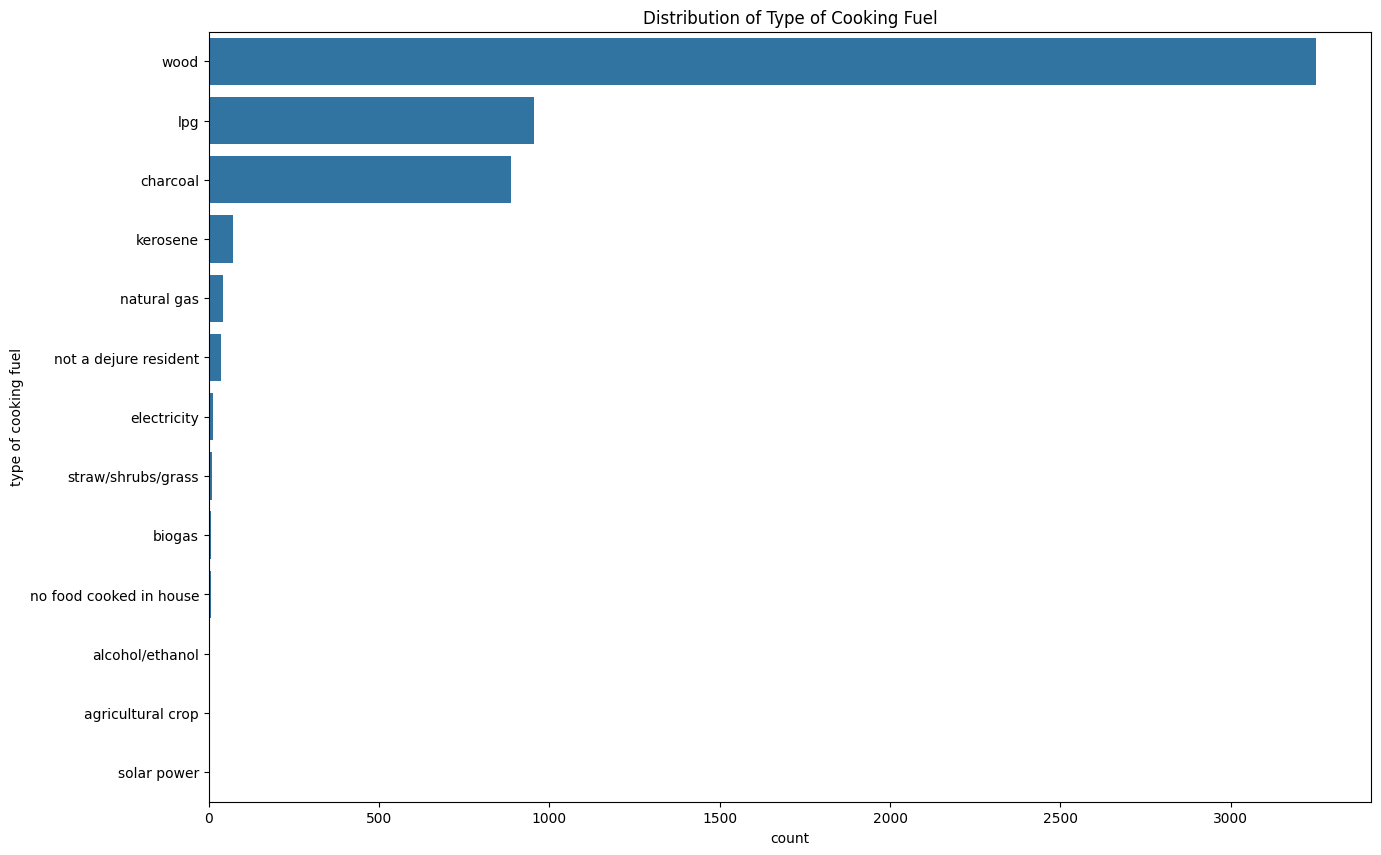

In [43]:
# Plot distribution of Type of Cooking Fuel
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='type of cooking fuel', order=df['type of cooking fuel'].value_counts().index)
plt.title('Distribution of Type of Cooking Fuel')
plt.show()

**Majority of the workers use Wood as cooking fuel**

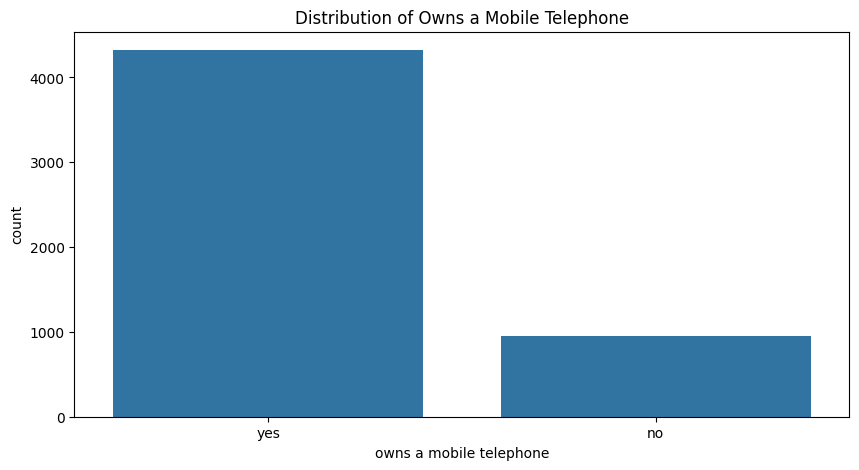

In [44]:
# Plot distribution of Owns a Mobile Telephone
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='owns a mobile telephone', order=df['owns a mobile telephone'].value_counts().index)
plt.title('Distribution of Owns a Mobile Telephone')
plt.show()

**Majority of the workers have Mobile Telephones**

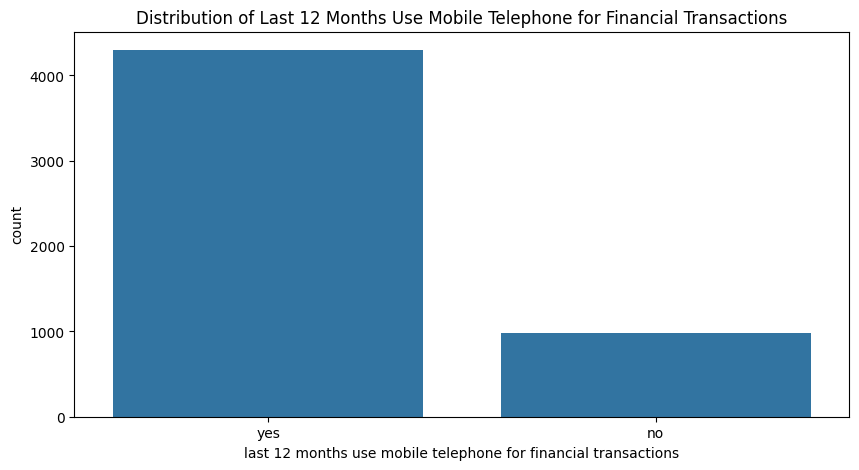

In [45]:
# Plot distribution of Last 12 Months Use Mobile Telephone for Financial Transactions
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='last 12 months use mobile telephone for financial transactions', order=df['last 12 months use mobile telephone for financial transactions'].value_counts().index)
plt.title('Distribution of Last 12 Months Use Mobile Telephone for Financial Transactions')
plt.show()

**Majority of the workers in the Last 12 Months Use Mobile Telephone for Financial Transactions**

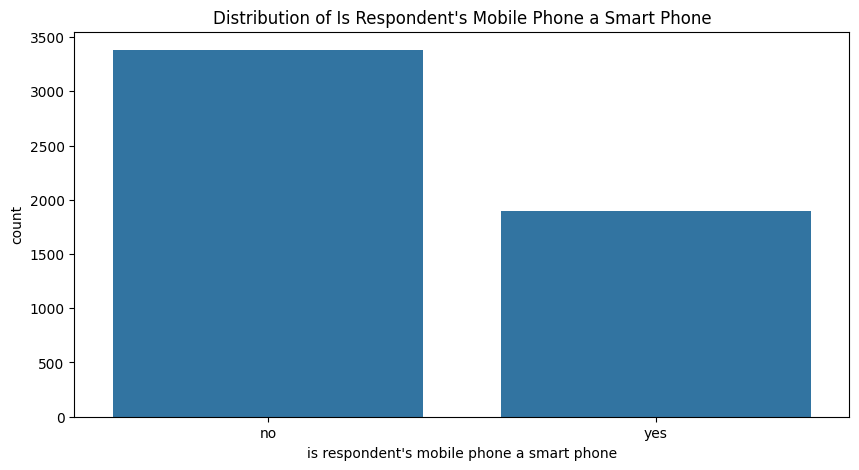

In [46]:
# Plot distribution of Is Respondent's Mobile Phone a Smart Phone
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='is respondent\'s mobile phone a smart phone', order=df['is respondent\'s mobile phone a smart phone'].value_counts().index)
plt.title('Distribution of Is Respondent\'s Mobile Phone a Smart Phone')
plt.show()

**Majority of the workers phones are not smart phones**

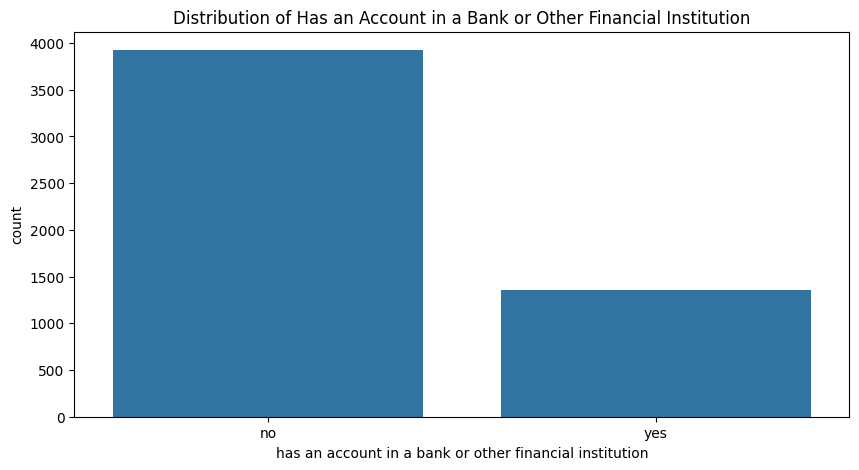

In [47]:
# Plot distribution of Has an Account in a Bank or Other Financial Institution
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='has an account in a bank or other financial institution', order=df['has an account in a bank or other financial institution'].value_counts().index)
plt.title('Distribution of Has an Account in a Bank or Other Financial Institution')
plt.show()

**Majority of the workers do not have an account in a bank or other financial institution**

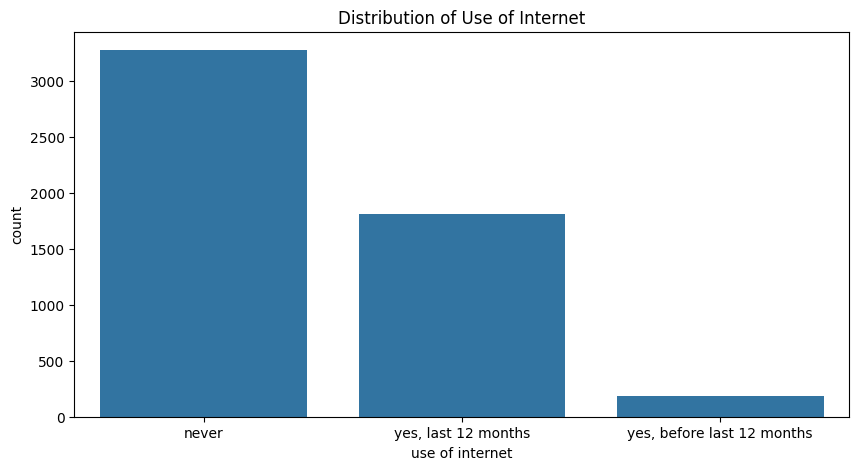

In [48]:
# Plot distribution of Use of Internet
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='use of internet', order=df['use of internet'].value_counts().index)
plt.title('Distribution of Use of Internet')
plt.show()

**Majority of the workers have never used the internet**

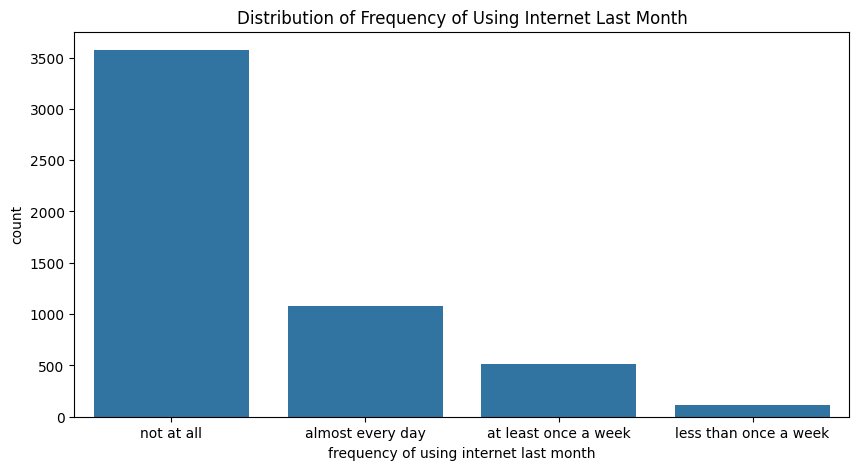

In [49]:
# Plot distribution of Frequency of Using Internet Last Month
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='frequency of using internet last month', order=df['frequency of using internet last month'].value_counts().index)
plt.title('Distribution of Frequency of Using Internet Last Month')
plt.show()

**Majority of the workers did not use the interent at all in the last month**

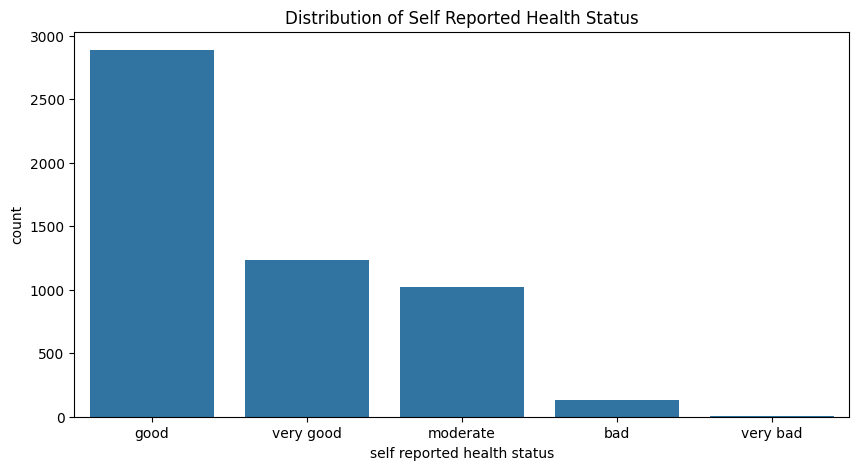

In [50]:
# Plot distribution of Self Reported Health Status
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='self reported health status', order=df['self reported health status'].value_counts().index)
plt.title('Distribution of Self Reported Health Status')
plt.show()

**Majority of the workers reported their health status as good**

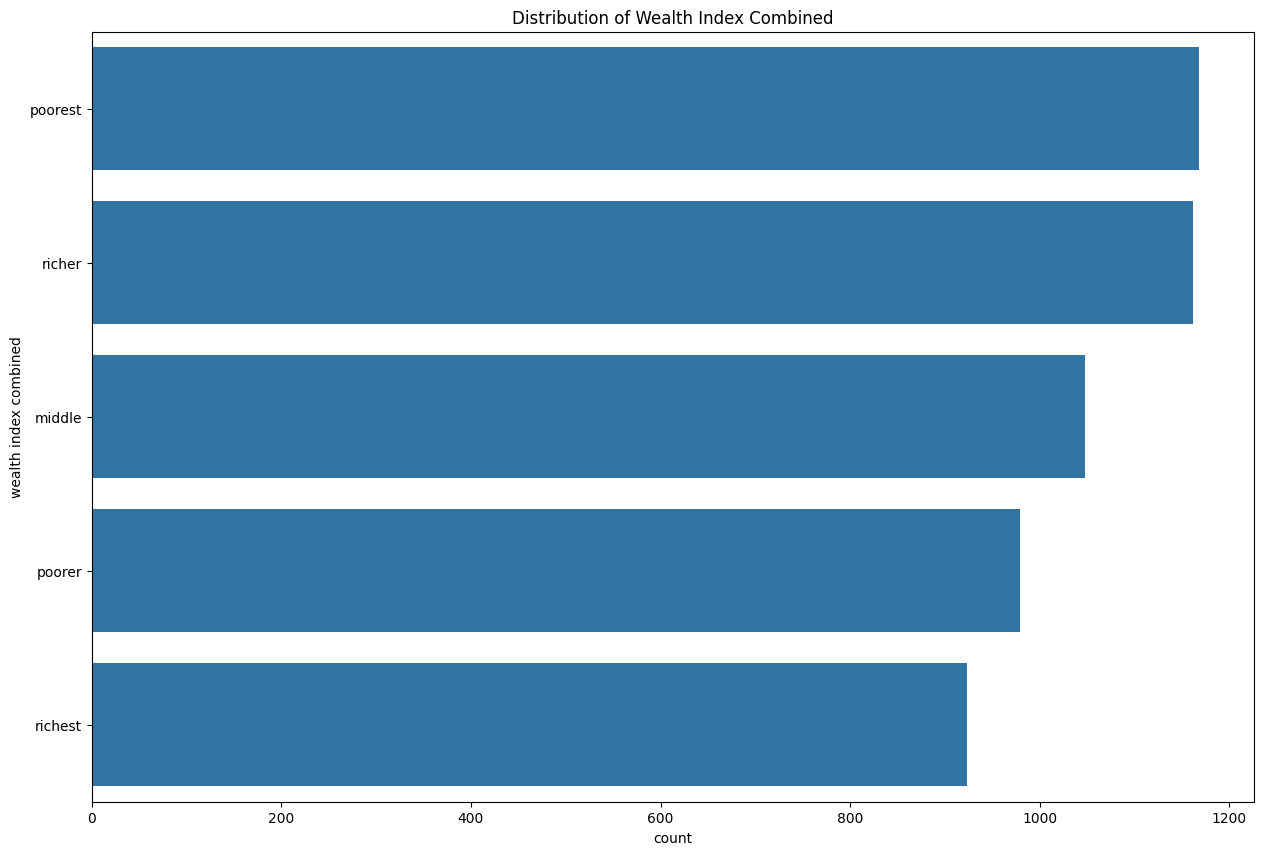

In [51]:
# Plot distribution of Wealth Index Combined
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='wealth index combined', order=df['wealth index combined'].value_counts().index)
plt.title('Distribution of Wealth Index Combined')
plt.show()

**Majority of the workers are extremely poor**

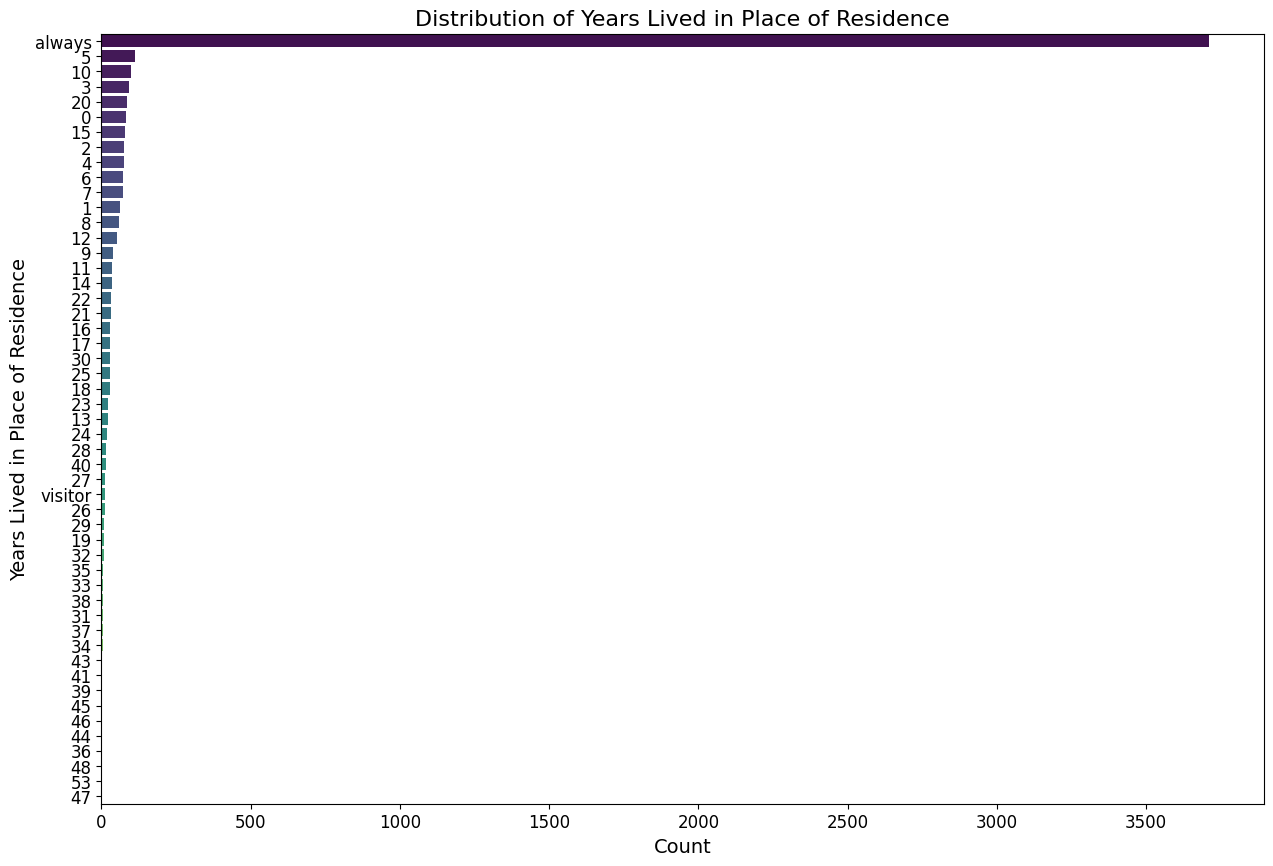

In [52]:
# Plot distribution of Years Lived in Place of Residence
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='years lived in place of residence', order=df['years lived in place of residence'].value_counts().index, palette='viridis')

plt.title('Distribution of Years Lived in Place of Residence', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Years Lived in Place of Residence', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Majority of the workers have always lived in the same place**

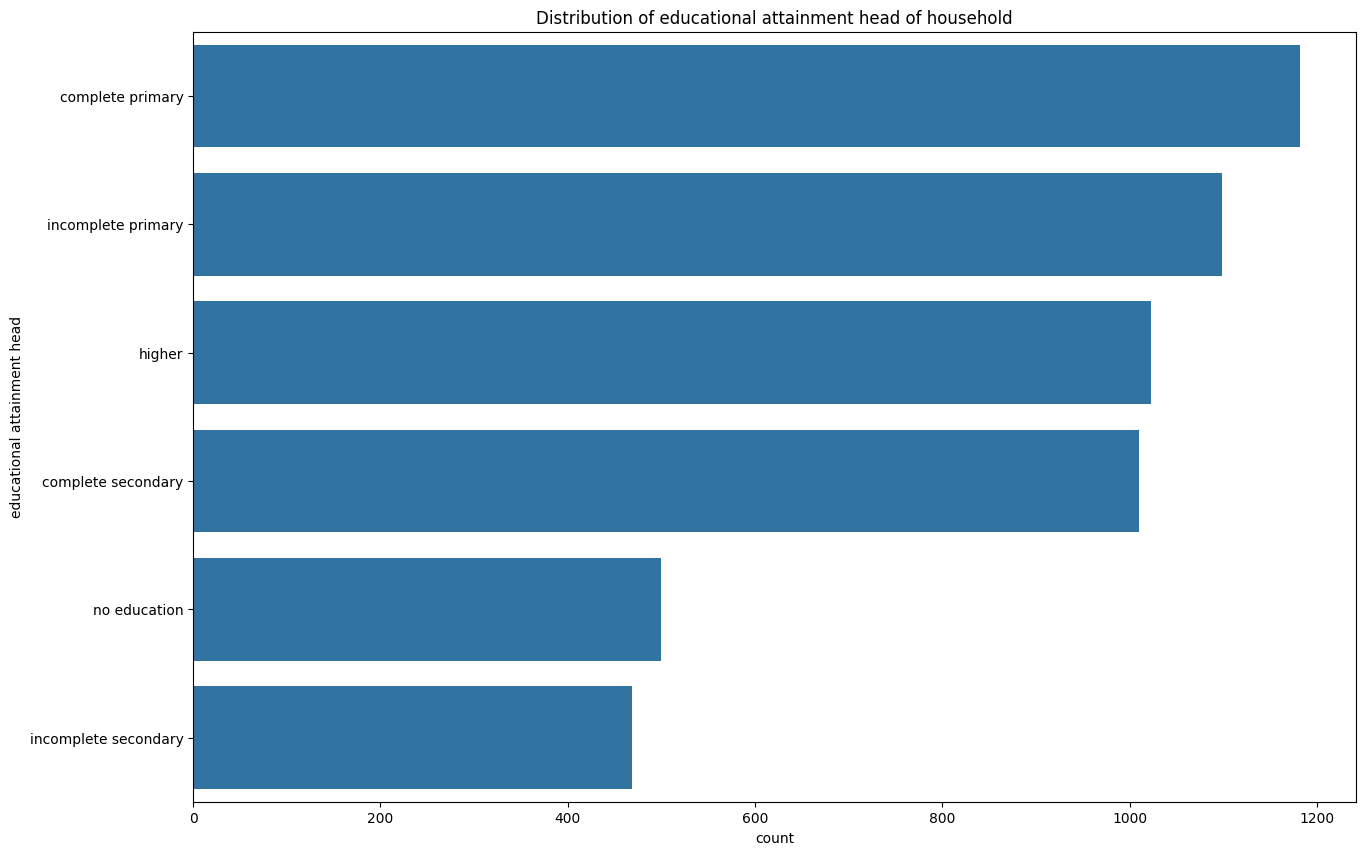

In [53]:
# Plot distribution of Educational attainment head
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='educational attainment head', order=df['educational attainment head'].value_counts().index)
plt.title('Distribution of educational attainment head of household')
plt.show()

**Majority of the household heads completed primary and very few completed high school.For those who completed highschool almost all got higher education**

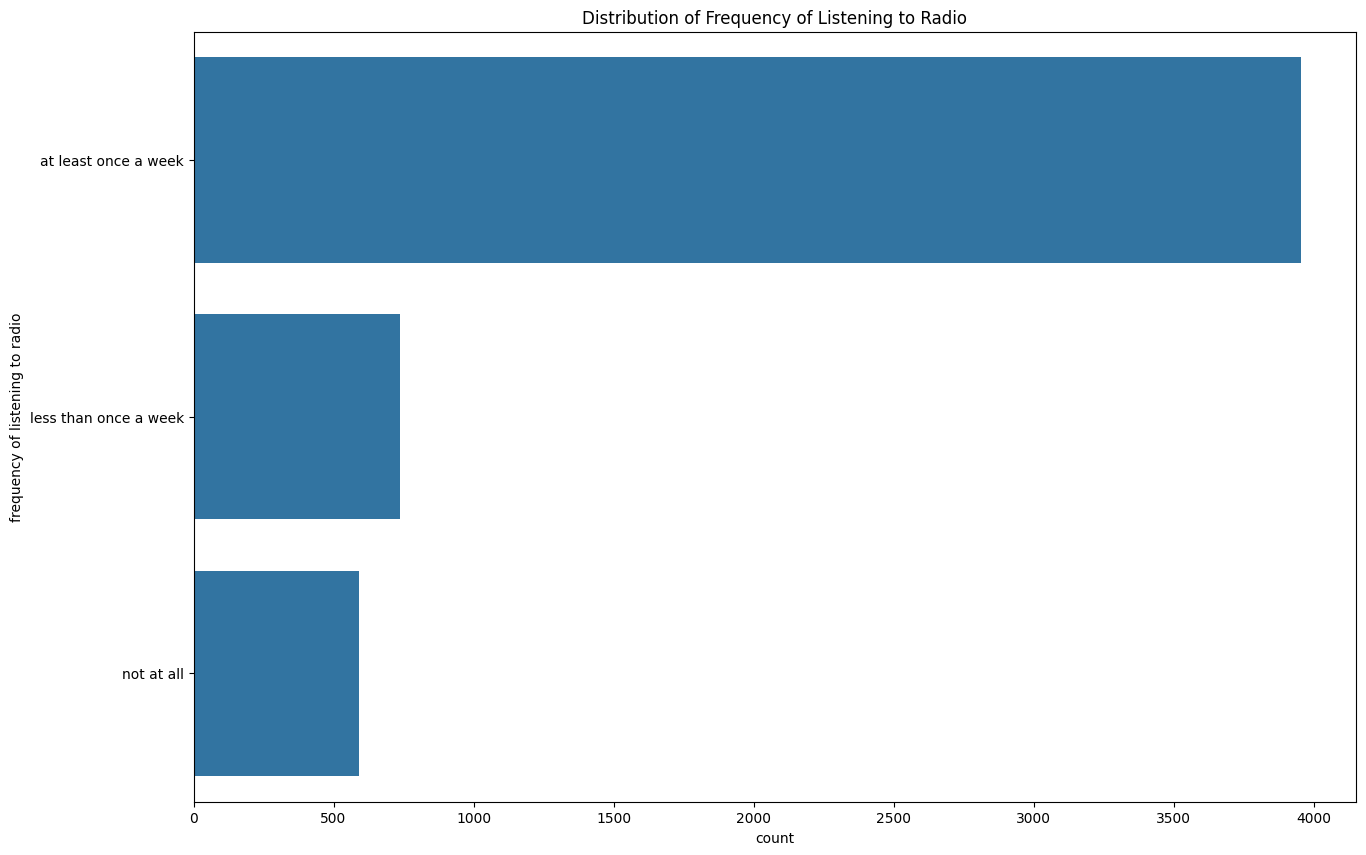

In [54]:
# Plot distribution of Frequency of Listening to Radio
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='frequency of listening to radio', order=df['frequency of listening to radio'].value_counts().index)
plt.title('Distribution of Frequency of Listening to Radio')
plt.show()

**Majority of the workers listen to the radio atleast once a week**

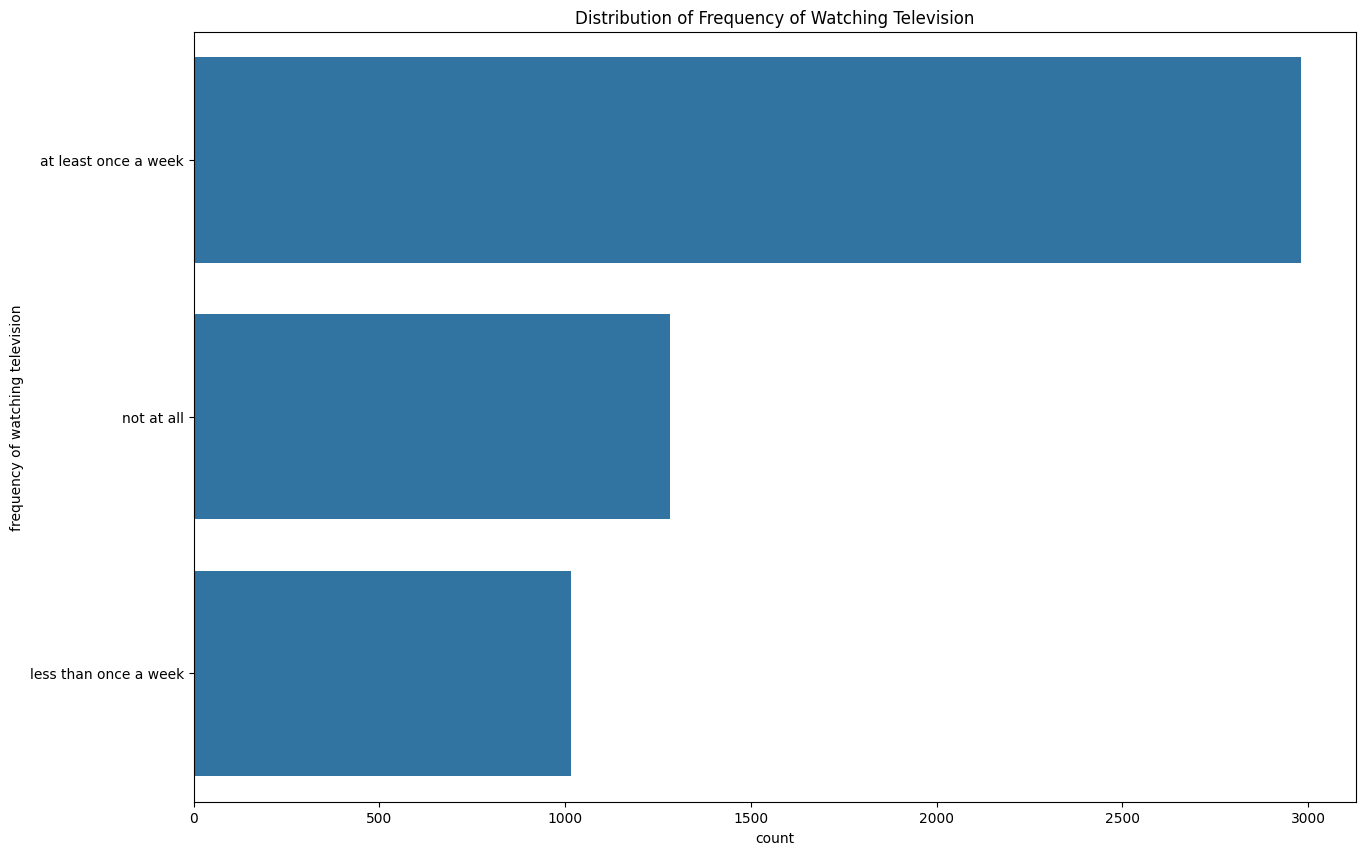

In [55]:
# Plot distribution of Frequency of Watching Television
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='frequency of watching television', order=df['frequency of watching television'].value_counts().index)
plt.title('Distribution of Frequency of Watching Television')
plt.show()

**Majority of the workers watch television atleast once a week**

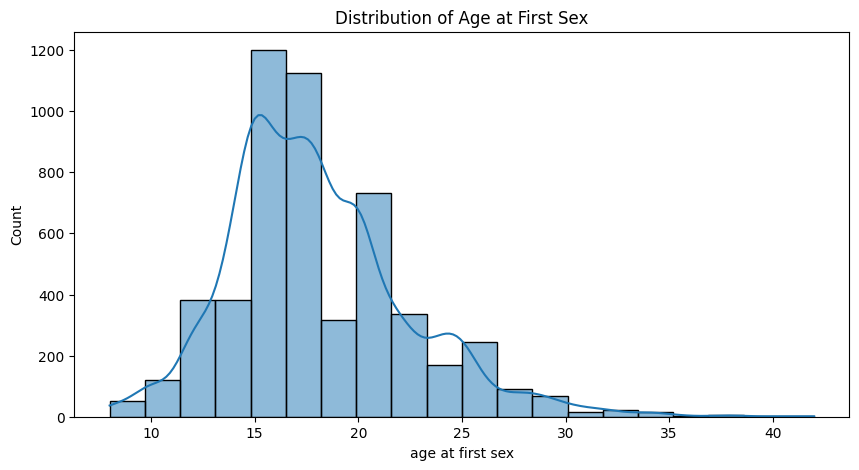

In [56]:
# Plot distribution of Age at First Sex
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='age at first sex', bins=20, kde=True)
plt.title('Distribution of Age at First Sex')
plt.show()

**Majority of the workers first had sex at the age of 16 and 17**

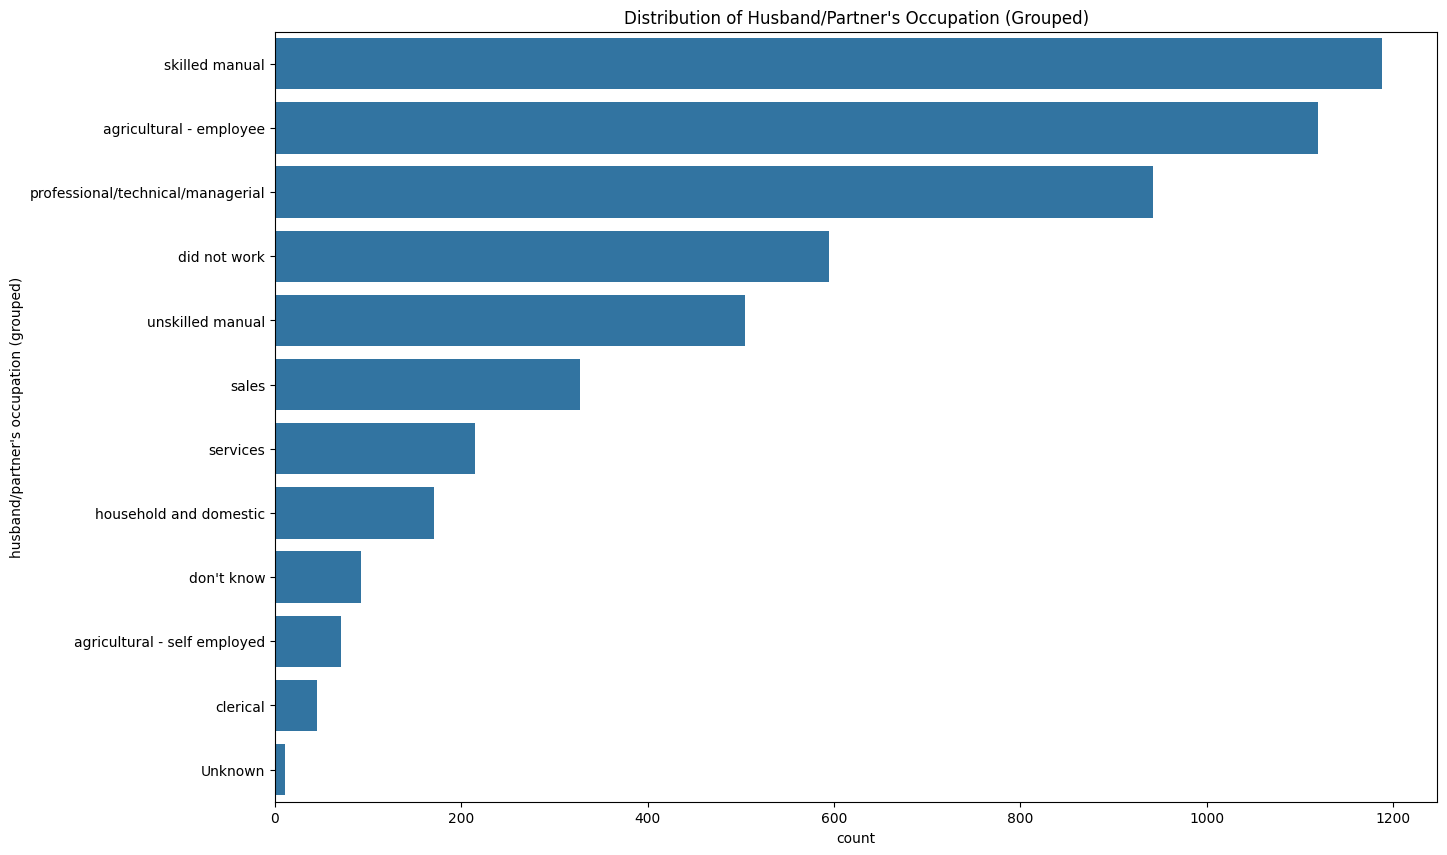

In [57]:
# Plot distribution of Husband/Partner's Occupation (Grouped)
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='husband/partner\'s occupation (grouped)', order=df['husband/partner\'s occupation (grouped)'].value_counts().index)
plt.title('Distribution of Husband/Partner\'s Occupation (Grouped)')
plt.show()

**Majority of the wrokers Husband/Partner's are skilled manually**

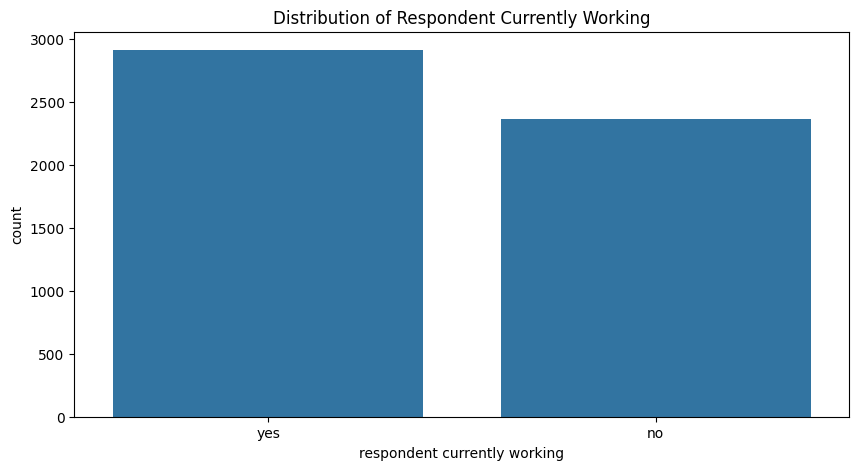

In [58]:
# Plot distribution of Respondent Currently Working
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='respondent currently working', order=df['respondent currently working'].value_counts().index)
plt.title('Distribution of Respondent Currently Working')
plt.show()

**Majority of the Respondent are Currently Working**

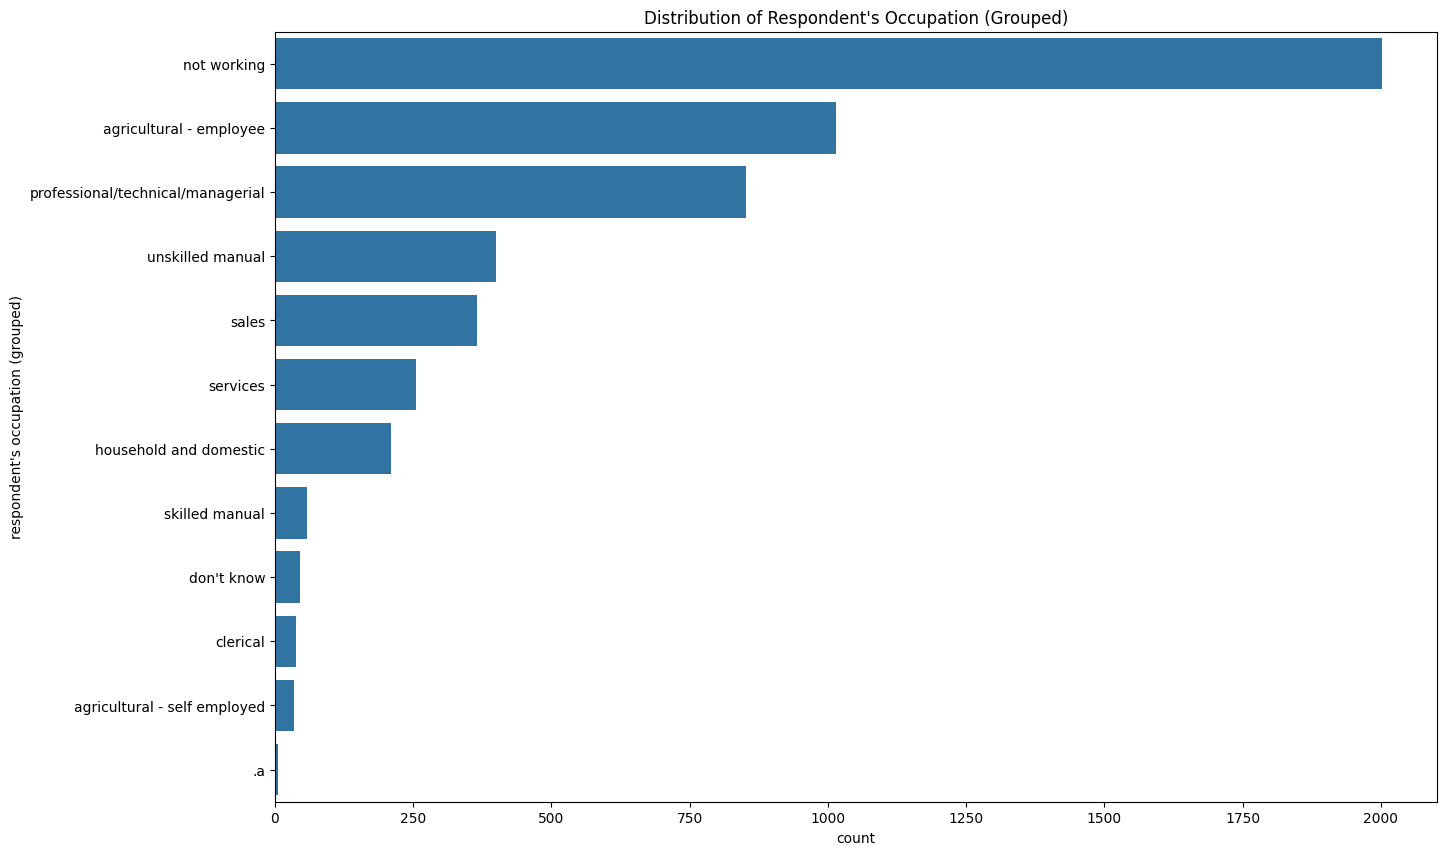

In [59]:
# Plot distribution of Respondent's Occupation (Grouped)
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='respondent\'s occupation (grouped)', order=df['respondent\'s occupation (grouped)'].value_counts().index)
plt.title('Distribution of Respondent\'s Occupation (Grouped)')
plt.show()

**Majority of the Respondent's are not working**

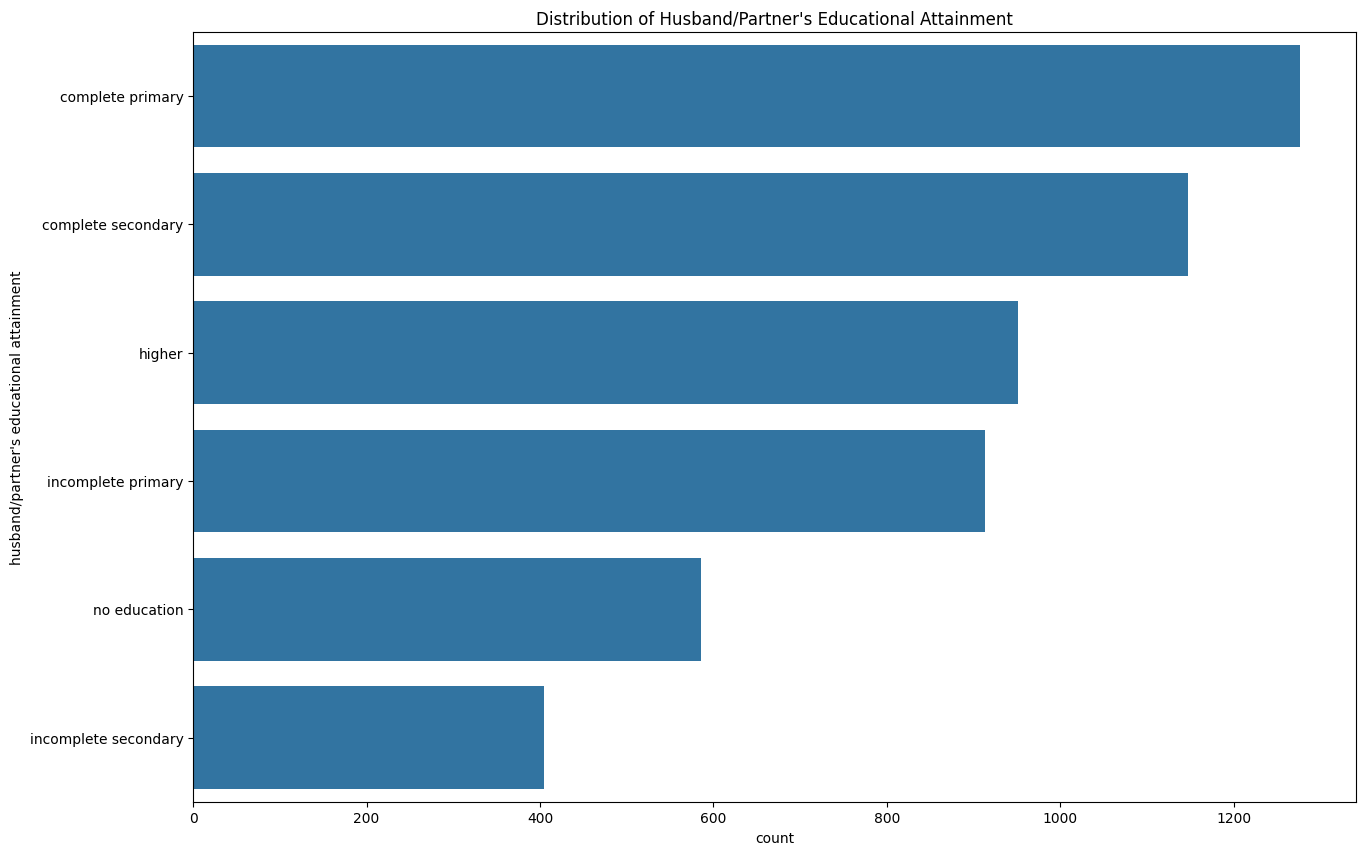

In [60]:
# Plot distribution of Husband/Partner's Educational Attainment
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='husband/partner\'s educational attainment', order=df['husband/partner\'s educational attainment'].value_counts().index)
plt.title('Distribution of Husband/Partner\'s Educational Attainment')
plt.show()

**Majority of the workers patners finished primary but very few got to highschool and even fewer got higher education**

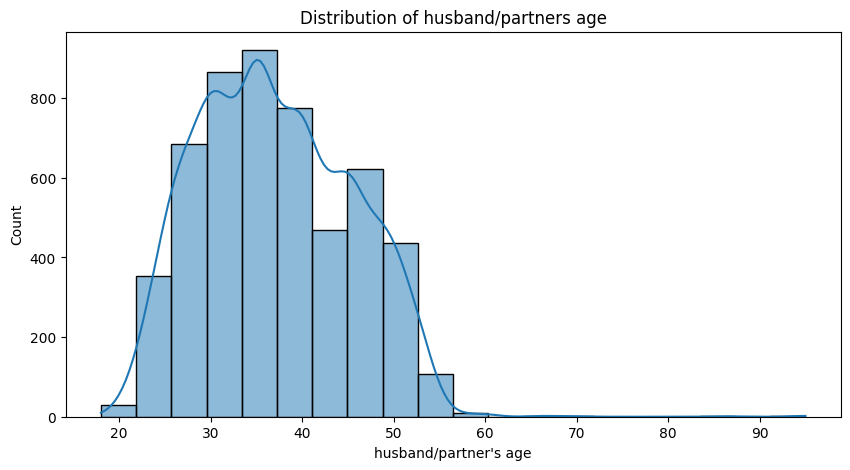

In [61]:
# Plot distribution of husband/partners age
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x="husband/partner's age", bins=20, kde=True)
plt.title('Distribution of husband/partners age')
plt.show()

**Majority of the patners are between the ages of 30 and 40 years**

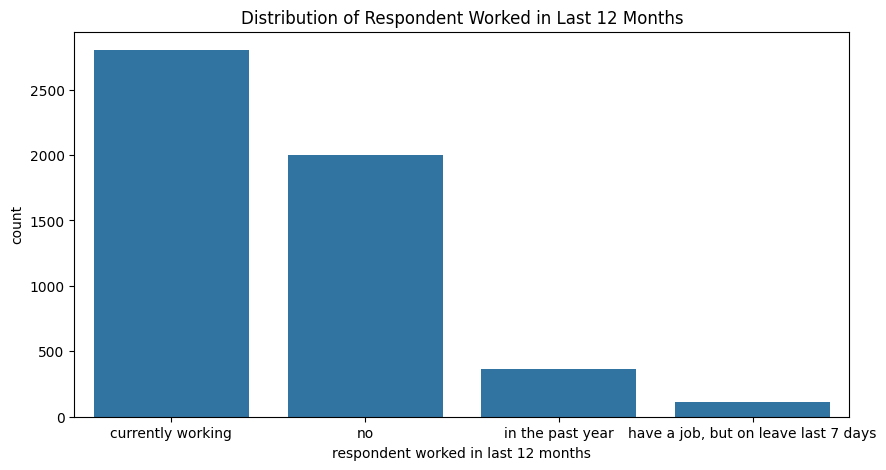

In [62]:
# Plot distribution of Respondent Worked in Last 12 Months
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='respondent worked in last 12 months', order=df['respondent worked in last 12 months'].value_counts().index)
plt.title('Distribution of Respondent Worked in Last 12 Months')
plt.show()

**Majority of Respondent in the Last 12 Months have been working**

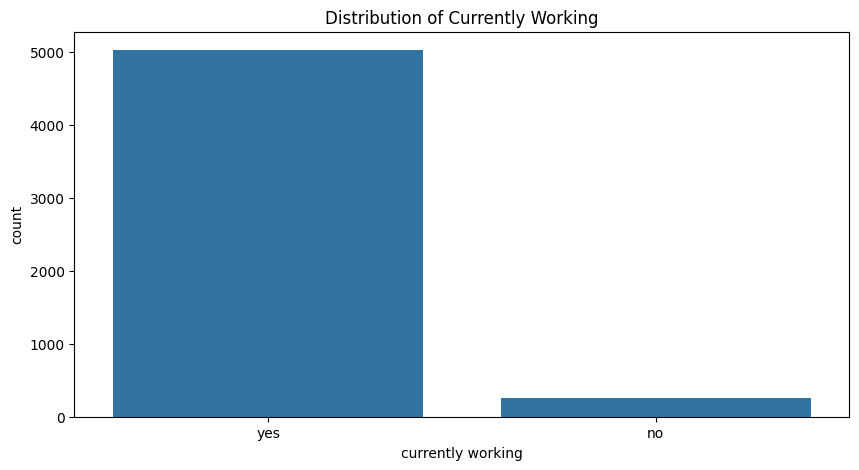

In [63]:
# Plot distribution of Currently Working
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='currently working', order=df['currently working'].value_counts().index)
plt.title('Distribution of Currently Working')
plt.show()

**Majority are currently working**

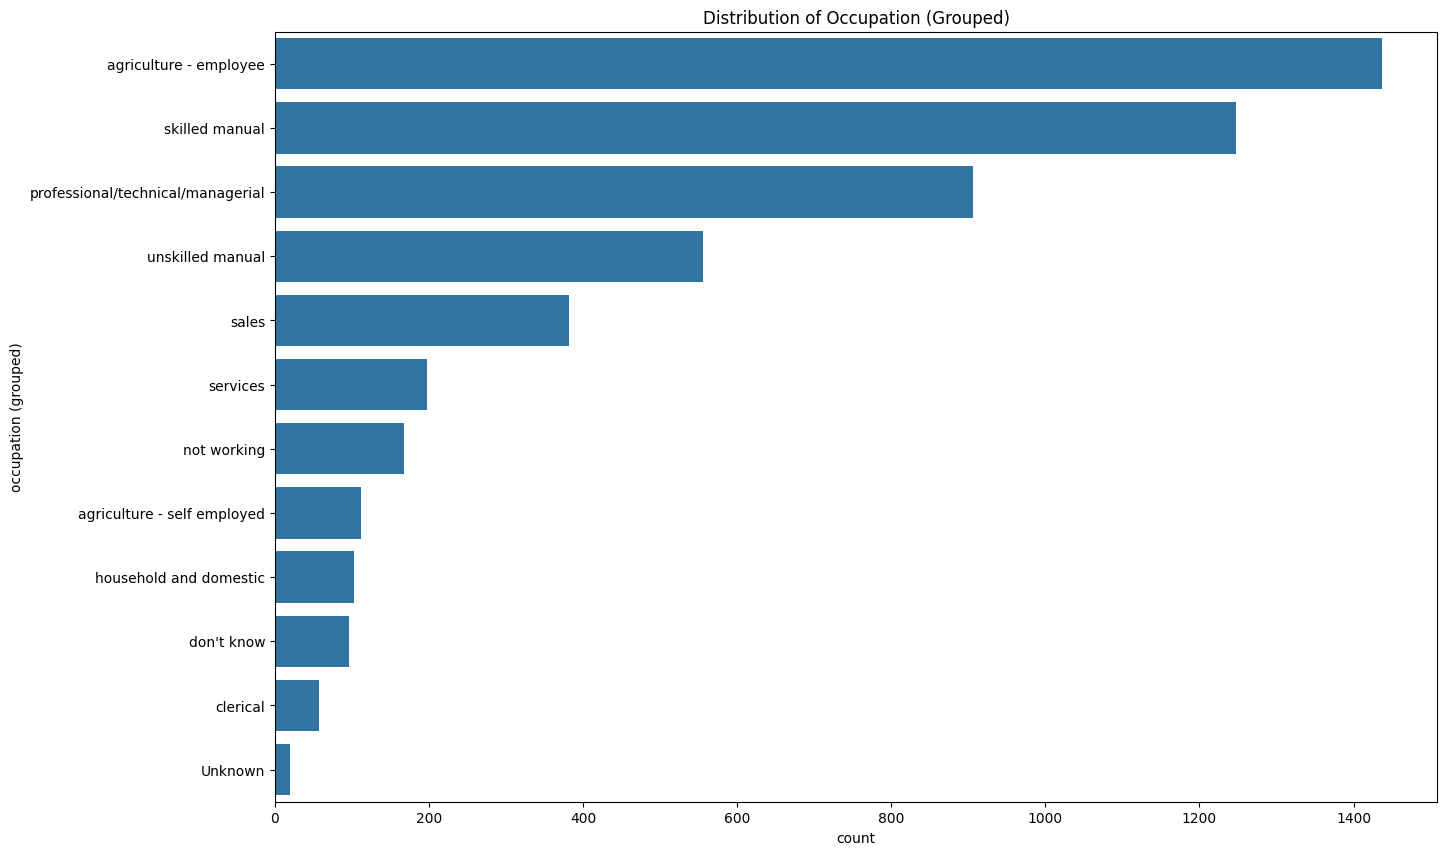

In [64]:
# Plot distribution of Occupation (Grouped)
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='occupation (grouped)', order=df['occupation (grouped)'].value_counts().index)
plt.title('Distribution of Occupation (Grouped)')
plt.show()

**Majority of the workers work in agriculture as employees**

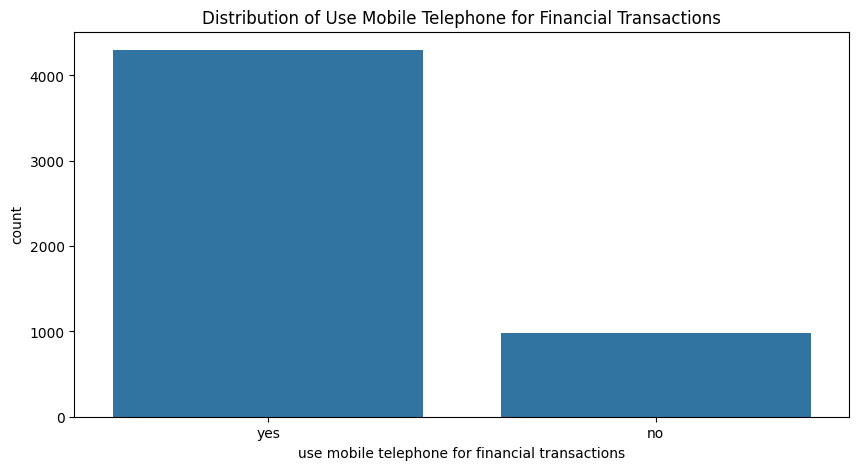

In [65]:
# Plot distribution of Use Mobile Telephone for Financial Transactions
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='use mobile telephone for financial transactions', order=df['use mobile telephone for financial transactions'].value_counts().index)
plt.title('Distribution of Use Mobile Telephone for Financial Transactions')
plt.show()

**Majority of the workers Use Mobile Telephone for Financial Transactions**

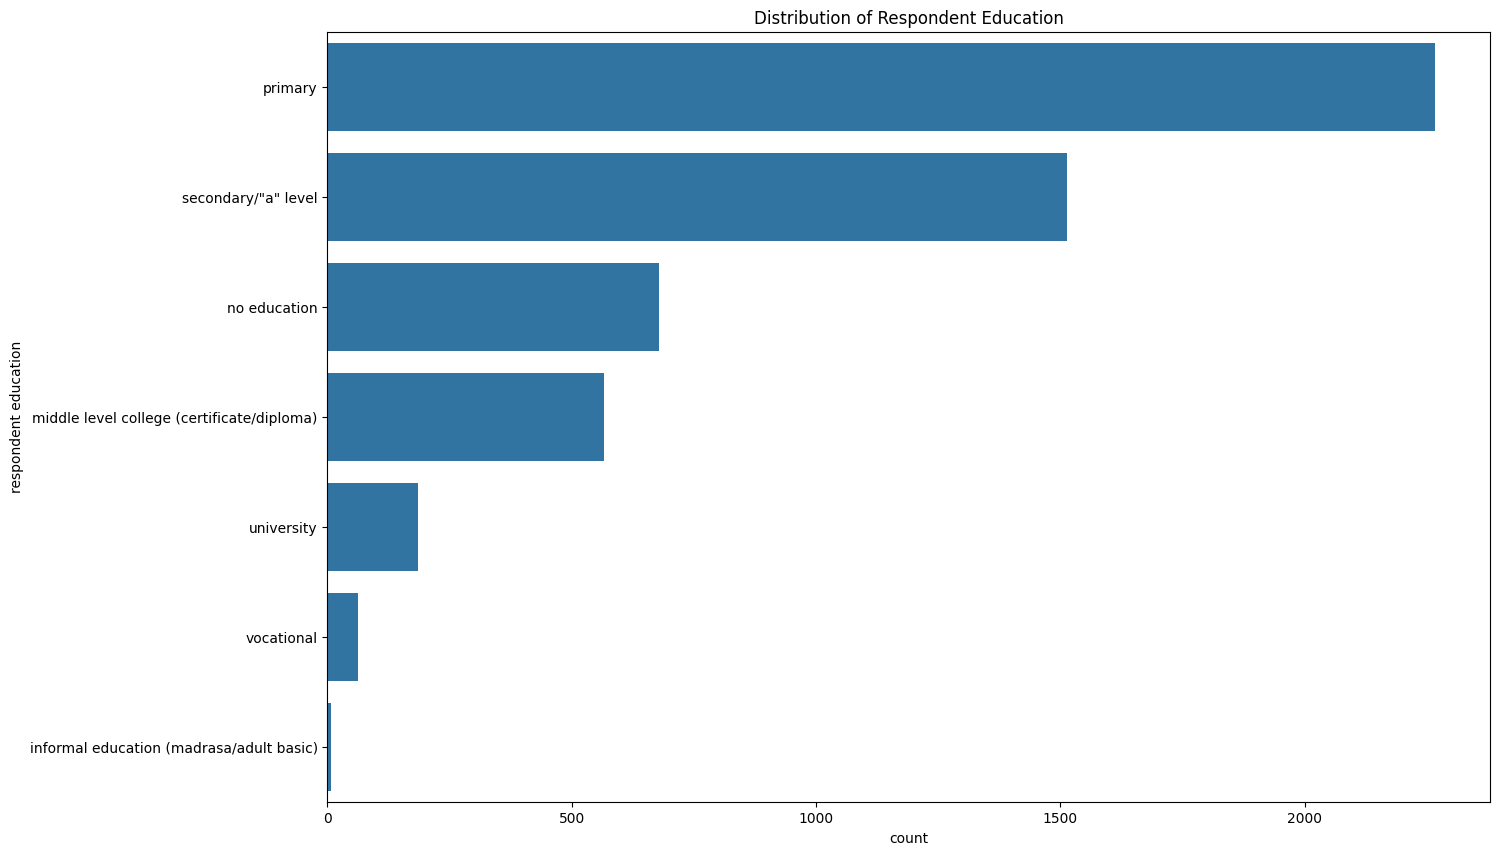

In [66]:
# Plot distribution of Respondent Education
plt.figure(figsize=(15, 10))
sns.countplot(data=df, y='respondent education', order=df['respondent education'].value_counts().index)
plt.title('Distribution of Respondent Education')
plt.show()

**Majority of the Respondants completed primary and very few completed high school.For those who completed highschool very few got higher education**

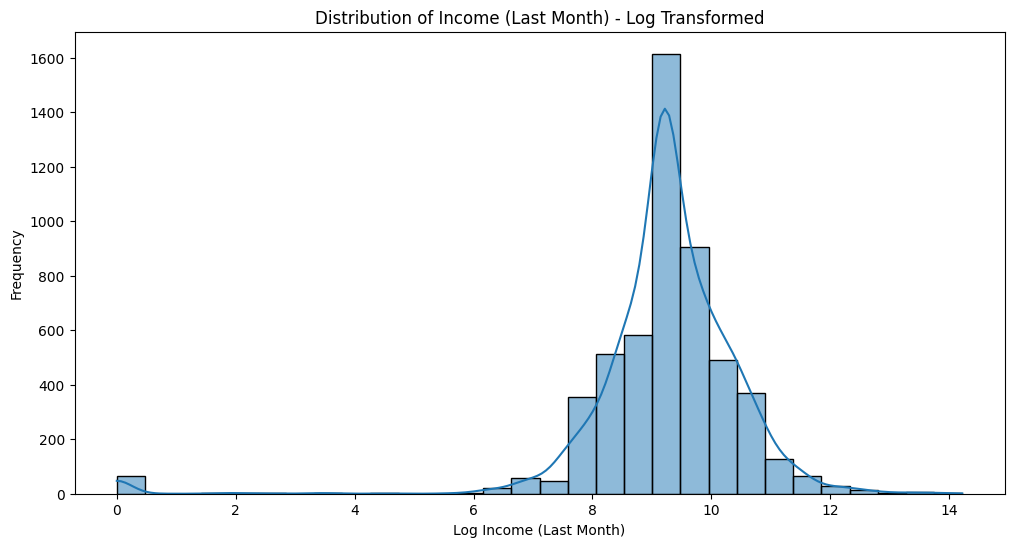

In [67]:
# Plot distribution of How Much Paid in Last Month.1
# Apply logarithmic transformation to income (add 1 to avoid log(0))
df['log_income'] = np.log1p(df['how much paid in last month.1'])

# Plot histogram with logarithmic scale on the x-axis
plt.figure(figsize=(12, 6))
sns.histplot(df['log_income'], bins=30, kde=True)

# Add titles and labels
plt.title('Distribution of Income (Last Month) - Log Transformed')
plt.xlabel('Log Income (Last Month)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

## **STATISTICAL ANALYSIS📉**

**Descriptive statistics**

In [68]:
# Descriptive statistics
df.describe()

,respondent's year of birth,respondent's current age,number of household members (listed),number of children 5 and under in household (de jure),age of household head,age at first sex,husband/partner's age,how much paid in last month.1,log_income
count,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5280.000000,5.280000e+03,5280.000000
mean,1989.858523,31.535985,5.198485,1.067992,38.101894,18.014015,37.085417,1.935130e+04,9.227184
std,7.710613,7.726686,2.195502,0.904263,9.433963,4.373043,8.302079,4.345663e+04,1.417065
min,1972.000000,15.000000,2.000000,0.000000,18.000000,8.000000,18.000000,0.000000e+00,0.000000
25%,1984.000000,25.000000,4.000000,0.000000,31.000000,15.000000,30.000000,6.000000e+03,8.699681
50%,1991.000000,31.000000,5.000000,1.000000,37.000000,17.000000,36.000000,1.000000e+04,9.210440
75%,1996.000000,37.000000,6.000000,2.000000,44.000000,20.000000,43.000000,2.000000e+04,9.903538
max,2007.000000,49.000000,21.000000,6.000000,95.000000,42.000000,95.000000,1.500000e+06,14.220976


**Correlation Analysis**

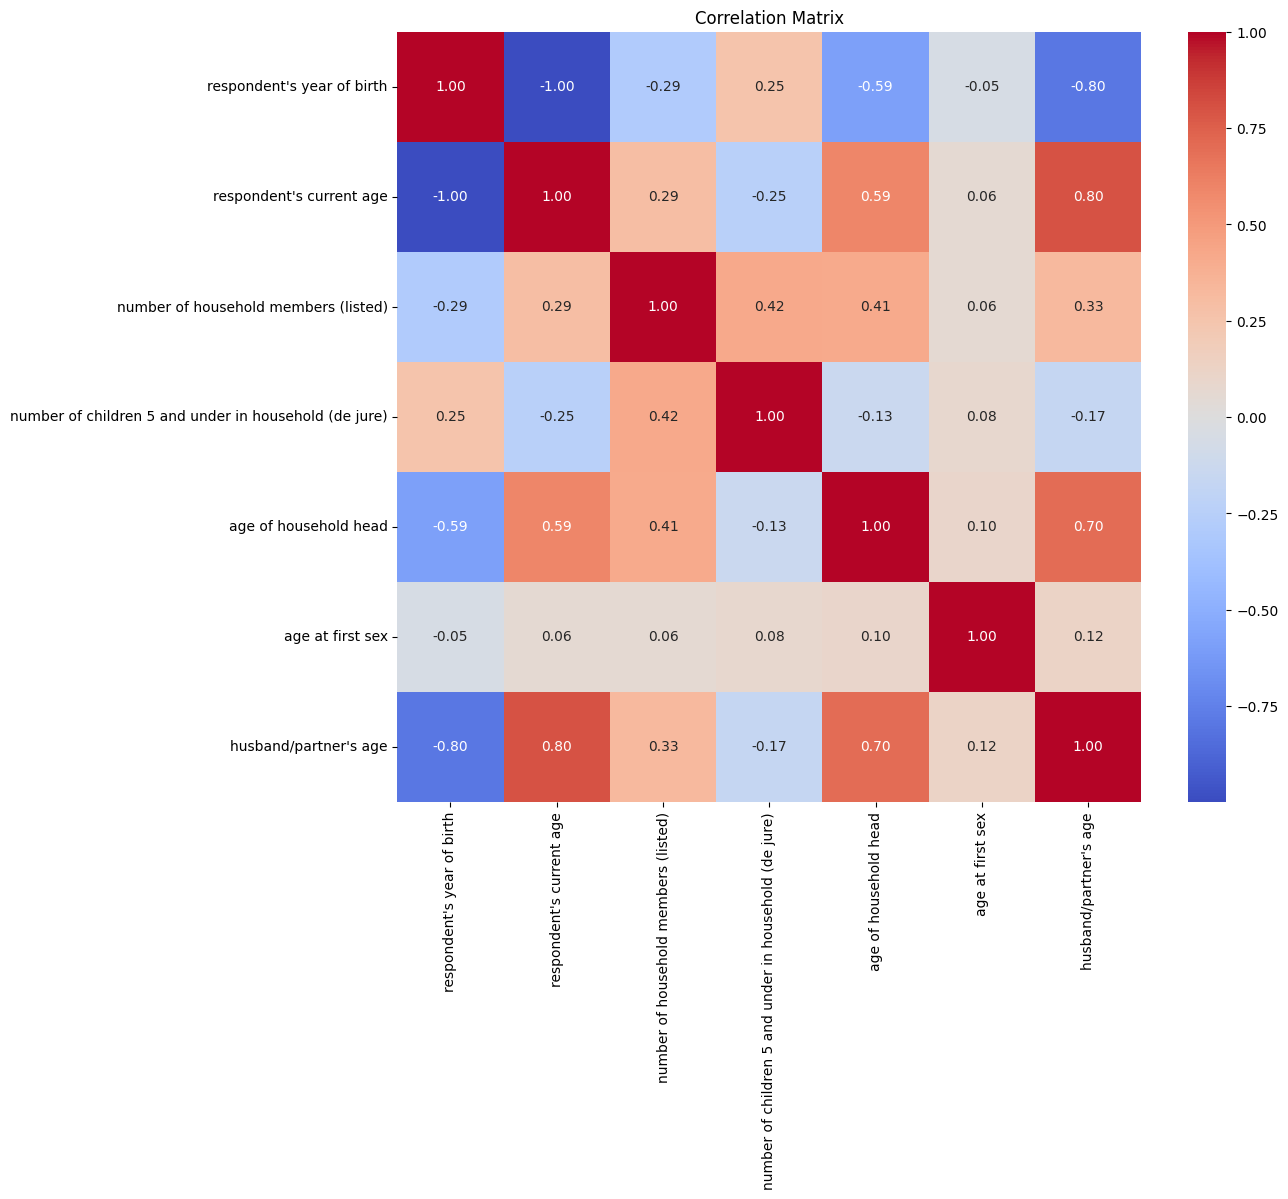

In [69]:
# Correlation Analysis

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64']).columns
numerical_df = df[numerical_columns]

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

**kruskal Wallis and Hypothesis Testing**

In [70]:
# Respondent's Year of Birth vs. Income
print("Respondent's Year of Birth vs. Income ")
birth = df['respondent\'s year of birth'].unique()
groups = [df[df['respondent\'s year of birth'] == year]['how much paid in last month.1'] for year in birth]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between birth years.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between birth years.")


Respondent's Year of Birth vs. Income 
Kruskal-Wallis H Test: H = 56.09, p-value = 0.0133
Reject H0: There is evidence of income differences between birth years.


In [72]:
# Age in 5-Year Groups vs. Income
print("Age in 5-Year Groups vs. Income ")
age_groups = df['age in 5-year groups'].unique()
groups = [df[df['age in 5-year groups'] == group]['how much paid in last month.1']
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between age in 5-year groups.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between age in 5-year groups.")

Age in 5-Year Groups vs. Income 
Kruskal-Wallis H Test: H = 20.79, p-value = 0.0020
Reject H0: There is evidence of income differences between age in 5-year groups.


In [76]:
# Region vs. Income
print("Region vs. Income ")
regions = df['region'].unique()
groups = [df[df['region'] == region]['how much paid in last month.1'] for region in regions]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between regions.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between regions.")

Region vs. Income 
Kruskal-Wallis H Test: H = 542.07, p-value = 0.0000
Reject H0: There is evidence of income differences between regions.


In [78]:
# Type of Place of Residence vs. Income
print("Type of Place of Residence vs. Income ")
residence_types = df['type of place of residence'].unique()
groups = [df[df['type of place of residence'] == res]['how much paid in last month.1'] for res in residence_types]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between types of place of residence.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between types of place of residence.")

Type of Place of Residence vs. Income 
Kruskal-Wallis H Test: H = 480.30, p-value = 0.0000
Reject H0: There is evidence of income differences between types of place of residence.


In [80]:
# Source of Drinking Water vs. Income
print("Source of Drinking Water vs. Income ")
water_sources = df['source of drinking water'].unique()
groups = [df[df['source of drinking water'] == source]['how much paid in last month.1'] for source in water_sources]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between sources of drinking water.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between sources of drinking water.")

Source of Drinking Water vs. Income 
Kruskal-Wallis H Test: H = 700.45, p-value = 0.0000
Reject H0: There is evidence of income differences between sources of drinking water.


In [82]:
# Type of Toilet Facility vs. Income
print("Type of Toilet Facility vs. Income ")
toilet_types = df['type of toilet facility'].unique()
groups = [df[df['type of toilet facility'] == t]['how much paid in last month.1'] for t in toilet_types]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between types of toilet facilities.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between types of toilet facilities.")

Type of Toilet Facility vs. Income 
Kruskal-Wallis H Test: H = 827.24, p-value = 0.0000
Reject H0: There is evidence of income differences between types of toilet facilities.


In [83]:
# Household Has: Electricity vs. Income
print("Household Has: Electricity vs. Income ")
electricity = df['household has: electricity'].unique()
groups = [df[df['household has: electricity'] == elec]['how much paid in last month.1'] for elec in electricity]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between households with and without electricity.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between households with and without electricity.")


Household Has: Electricity vs. Income 
Kruskal-Wallis H Test: H = 580.80, p-value = 0.0000
Reject H0: There is evidence of income differences between households with and without electricity.


In [84]:
# Household Has: Radio vs. Income
print("Household Has: Radio vs. Income ")
radio = df['household has: radio'].unique()
groups = [df[df['household has: radio'] == rad]['how much paid in last month.1'] for rad in radio]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between households with and without radio.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between households with and without radio.")


Household Has: Radio vs. Income 
Kruskal-Wallis H Test: H = 66.26, p-value = 0.0000
Reject H0: There is evidence of income differences between households with and without radio.


In [85]:
# Household Has: Television vs. Income
print("Household Has: Television vs. Income ")
television = df['household has: television'].unique()
groups = [df[df['household has: television'] == tv]['how much paid in last month.1'] for tv in television]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between households with and without television.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between households with and without television.")


Household Has: Television vs. Income 
Kruskal-Wallis H Test: H = 490.34, p-value = 0.0000
Reject H0: There is evidence of income differences between households with and without television.


In [86]:
# Household Has: Bicycle vs. Income
print("Household Has: Bicycle vs. Income ")
bicycle = df['household has: bicycle'].unique()
groups = [df[df['household has: bicycle'] == bike]['how much paid in last month.1'] for bike in bicycle]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between households with and without bicycle.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between households with and without bicycle.")

Household Has: Bicycle vs. Income 
Kruskal-Wallis H Test: H = 46.01, p-value = 0.0000
Reject H0: There is evidence of income differences between households with and without bicycle.


In [87]:
# Household Has: Motorcycle/Scooter vs. Income
print("Household Has: Motorcycle/Scooter vs. Income ")
motorcycle = df['household has: motorcycle/scooter'].unique()
groups = [df[df['household has: motorcycle/scooter'] == moto]['how much paid in last month.1'] for moto in motorcycle]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between households with and without motorcycle/scooter.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between households with and without motorcycle/scooter.")


Household Has: Motorcycle/Scooter vs. Income 
Kruskal-Wallis H Test: H = 33.90, p-value = 0.0000
Reject H0: There is evidence of income differences between households with and without motorcycle/scooter.


In [88]:
# Household Has: Car/Truck vs. Income
print("Household Has: Car/Truck vs. Income ")
car_truck = df['household has: car/truck'].unique()
groups = [df[df['household has: car/truck'] == car]['how much paid in last month.1'] for car in car_truck]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between households with and without car/truck.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between households with and without car/truck.")


Household Has: Car/Truck vs. Income 
Kruskal-Wallis H Test: H = 360.04, p-value = 0.0000
Reject H0: There is evidence of income differences between households with and without car/truck.


In [89]:
# Main Floor Material vs. Income
print("Main Floor Material vs. Income")
floor_materials = df['main floor material'].unique()
groups = [df[df['main floor material'] == floor]['how much paid in last month.1'] for floor in floor_materials]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different floor materials.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different floor materials.")


Main Floor Material vs. Income
Kruskal-Wallis H Test: H = 816.37, p-value = 0.0000
Reject H0: There is evidence of income differences between different floor materials.


In [90]:
# Main Wall Material vs. Income
print("Main Wall Material vs. Income")
wall_materials = df['main wall material'].unique()
groups = [df[df['main wall material'] == wall]['how much paid in last month.1'] for wall in wall_materials]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different wall materials.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different wall materials.")


Main Wall Material vs. Income
Kruskal-Wallis H Test: H = 746.86, p-value = 0.0000
Reject H0: There is evidence of income differences between different wall materials.


In [91]:
# Main Roof Material vs. Income
print("Main Roof Material vs. Income ")
roof_materials = df['main roof material'].unique()
groups = [df[df['main roof material'] == roof]['how much paid in last month.1'] for roof in roof_materials]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different roof materials.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different roof materials.")


Main Roof Material vs. Income 
Kruskal-Wallis H Test: H = 197.84, p-value = 0.0000
Reject H0: There is evidence of income differences between different roof materials.


In [92]:
# Number of Household Members vs. Income
print("Number of Household Members vs. Income ")
household_members = df['number of household members (listed)'].unique()
groups = [df[df['number of household members (listed)'] == members]['how much paid in last month.1'] for members in household_members]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between households with different number of members.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between households with different number of members.")


Number of Household Members vs. Income 
Kruskal-Wallis H Test: H = 57.64, p-value = 0.0000
Reject H0: There is evidence of income differences between households with different number of members.


In [93]:
# Number of Children 5 and Under in Household vs. Income
print("Number of Children 5 and Under in Household vs. Income ")
children_under_5 = df['number of children 5 and under in household (de jure)'].unique()
groups = [df[df['number of children 5 and under in household (de jure)'] == children]['how much paid in last month.1'] for children in children_under_5]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between households with different number of children 5 and under.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between households with different number of children 5 and under.")


Number of Children 5 and Under in Household vs. Income 
Kruskal-Wallis H Test: H = 25.73, p-value = 0.0003
Reject H0: There is evidence of income differences between households with different number of children 5 and under.


In [94]:
# Educational Attainment vs. Income
print("Educational Attainment vs. Income")
education_levels = df['educational attainment'].unique()
groups = [df[df['educational attainment'] == edu]['how much paid in last month.1'] for edu in education_levels]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different educational attainments.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different educational attainments.")


Educational Attainment vs. Income
Kruskal-Wallis H Test: H = 672.19, p-value = 0.0000
Reject H0: There is evidence of income differences between different educational attainments.


In [95]:
# Relationship to Household Head vs. Income
print("Relationship to Household Head vs. Income ")
relationships = df['relationship to household head'].unique()
groups = [df[df['relationship to household head'] == rel]['how much paid in last month.1'] for rel in relationships]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different relationships to household head.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different relationships to household head.")


Relationship to Household Head vs. Income 
Kruskal-Wallis H Test: H = 14.41, p-value = 0.0253
Reject H0: There is evidence of income differences between different relationships to household head.


In [96]:
# Sex of Household Head vs. Income
print("Sex of Household Head vs. Income ")
sex_head = df['sex of household head'].unique()
groups = [df[df['sex of household head'] == sex]['how much paid in last month.1'] for sex in sex_head]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different sexes of household head.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different sexes of household head.")


Sex of Household Head vs. Income 
Kruskal-Wallis H Test: H = 1.72, p-value = 0.1896
Fail to reject H0: Insufficient evidence to suggest income differences between different sexes of household head.


In [97]:
# Age of Household Head vs. Income
print("Age of Household Head vs. Income")
age_head = df['age of household head'].unique()
groups = [df[df['age of household head'] == age]['how much paid in last month.1'] for age in age_head]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different ages of household head.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different ages of household head.")


Age of Household Head vs. Income
Kruskal-Wallis H Test: H = 63.55, p-value = 0.6627
Fail to reject H0: Insufficient evidence to suggest income differences between different ages of household head.


In [98]:
# Literacy vs. Income
print("Literacy vs. Income ")
literacy = df['literacy'].unique()
groups = [df[df['literacy'] == lit]['how much paid in last month.1'] for lit in literacy]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different literacy levels.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different literacy levels.")


Literacy vs. Income 
Kruskal-Wallis H Test: H = 96.82, p-value = 0.0000
Reject H0: There is evidence of income differences between different literacy levels.


In [100]:
# Type of Cooking Fuel vs. Income
print("Type of Cooking Fuel vs. Income ")
cooking_fuel = df['type of cooking fuel'].unique()
groups = [df[df['type of cooking fuel'] == fuel]['how much paid in last month.1'] for fuel in cooking_fuel]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different types of cooking fuel.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different types of cooking fuel.")


Type of Cooking Fuel vs. Income 
Kruskal-Wallis H Test: H = 820.82, p-value = 0.0000
Reject H0: There is evidence of income differences between different types of cooking fuel.


In [101]:
# Owns a Mobile Telephone vs. Income
print("Owns a Mobile Telephone vs. Income")
owns_mobile = df['owns a mobile telephone'].unique()
groups = [df[df['owns a mobile telephone'] == own]['how much paid in last month.1'] for own in owns_mobile]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between households that own a mobile telephone and those that do not.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between households that own a mobile telephone and those that do not.")


Owns a Mobile Telephone vs. Income
Kruskal-Wallis H Test: H = 235.95, p-value = 0.0000
Reject H0: There is evidence of income differences between households that own a mobile telephone and those that do not.


In [102]:
# Last 12 Months Use Mobile Telephone for Financial Transactions vs. Income
print("Last 12 Months Use Mobile Telephone for Financial Transactions vs. Income ")
mobile_financial = df['last 12 months use mobile telephone for financial transactions'].unique()
groups = [df[df['last 12 months use mobile telephone for financial transactions'] == trans]['how much paid in last month.1'] for trans in mobile_financial]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between households that use mobile telephones for financial transactions and those that do not.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between households that use mobile telephones for financial transactions and those that do not.")


Last 12 Months Use Mobile Telephone for Financial Transactions vs. Income 
Kruskal-Wallis H Test: H = 116.70, p-value = 0.0000
Reject H0: There is evidence of income differences between households that use mobile telephones for financial transactions and those that do not.


In [104]:
# Is Respondent's Mobile Phone a Smart Phone vs. Income
print("Is Respondent's Mobile Phone a Smart Phone vs. Income ")
smart_phones = df['is respondent\'s mobile phone a smart phone'].unique()
groups = [df[df['is respondent\'s mobile phone a smart phone'] == phone]['how much paid in last month.1'] for phone in smart_phones]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between users with and without smart phones.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between users with and without smart phones.")


Is Respondent's Mobile Phone a Smart Phone vs. Income 
Kruskal-Wallis H Test: H = 715.28, p-value = 0.0000
Reject H0: There is evidence of income differences between users with and without smart phones.


In [105]:
# Has an Account in a Bank or Other Financial Institution vs. Income
print("Has an Account in a Bank or Other Financial Institution vs. Income ")
bank_accounts = df['has an account in a bank or other financial institution'].unique()
groups = [df[df['has an account in a bank or other financial institution'] == account]['how much paid in last month.1'] for account in bank_accounts]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between those with and without a bank account.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between those with and without a bank account.")


Has an Account in a Bank or Other Financial Institution vs. Income 
Kruskal-Wallis H Test: H = 425.69, p-value = 0.0000
Reject H0: There is evidence of income differences between those with and without a bank account.


In [106]:
# Use of Internet vs. Income
print("Use of Internet vs. Income ")
internet_use = df['use of internet'].unique()
groups = [df[df['use of internet'] == use]['how much paid in last month.1'] for use in internet_use]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different internet usage statuses.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different internet usage statuses.")


Use of Internet vs. Income 
Kruskal-Wallis H Test: H = 656.43, p-value = 0.0000
Reject H0: There is evidence of income differences between different internet usage statuses.


In [107]:
# Frequency of Using Internet Last Month vs. Income
internet_frequency = df['frequency of using internet last month'].unique()
groups = [df[df['frequency of using internet last month'] == freq]['how much paid in last month.1'] for freq in internet_frequency]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different internet usage frequencies.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different internet usage frequencies.")


Kruskal-Wallis H Test: H = 736.22, p-value = 0.0000
Reject H0: There is evidence of income differences between different internet usage frequencies.


In [108]:
# Self Reported Health Status vs. Income
print("Self Reported Health Status vs. Income ")
health_statuses = df['self reported health status'].unique()
groups = [df[df['self reported health status'] == status]['how much paid in last month.1'] for status in health_statuses]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different self-reported health statuses.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different self-reported health statuses.")


Self Reported Health Status vs. Income 
Kruskal-Wallis H Test: H = 21.55, p-value = 0.0002
Reject H0: There is evidence of income differences between different self-reported health statuses.


In [109]:
# Wealth Index Combined vs. Income
print("Wealth Index Combined vs. Income ")
wealth_indices = df['wealth index combined'].unique()
groups = [df[df['wealth index combined'] == index]['how much paid in last month.1']for index in wealth_indices]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different wealth indices.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different wealth indices.")


Wealth Index Combined vs. Income 
Kruskal-Wallis H Test: H = 1150.19, p-value = 0.0000
Reject H0: There is evidence of income differences between different wealth indices.


In [110]:
# Years Lived in Place of Residence vs. Income
print("Years Lived in Place of Residence vs. Income ")
residence_years = df['years lived in place of residence'].unique()
groups = [df[df['years lived in place of residence'] == year]['how much paid in last month.1'] for year in residence_years]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different years lived in place of residence.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different years lived in place of residence.")


Years Lived in Place of Residence vs. Income 
Kruskal-Wallis H Test: H = 237.75, p-value = 0.0000
Reject H0: There is evidence of income differences between different years lived in place of residence.


In [111]:
# Educational Attainment Head vs. Income
print("Educational Attainment Head vs. Income ")
education_heads = df['educational attainment head'].unique()
groups = [df[df['educational attainment head'] == education]['how much paid in last month.1'] for education in education_heads]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different educational attainment levels of the head.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different educational attainment levels of the head.")


Educational Attainment Head vs. Income 
Kruskal-Wallis H Test: H = 898.39, p-value = 0.0000
Reject H0: There is evidence of income differences between different educational attainment levels of the head.


In [112]:
# Frequency of Listening to Radio vs. Income
print("Frequency of Listening to Radio vs. Income ")
radio_frequencies = df['frequency of listening to radio'].unique()
groups = [df[df['frequency of listening to radio'] == freq]['how much paid in last month.1'] for freq in radio_frequencies]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different radio listening frequencies.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different radio listening frequencies.")


Frequency of Listening to Radio vs. Income 
Kruskal-Wallis H Test: H = 5.60, p-value = 0.0609
Fail to reject H0: Insufficient evidence to suggest income differences between different radio listening frequencies.


In [114]:
# Frequency of Watching Television vs. Income
print("Frequency of Watching Television vs. Income")
watching_television = df['frequency of watching television'].unique()
groups = [df[df['frequency of watching television'] == value]['how much paid in last month.1'] for value in watching_television]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different values of frequency of watching television.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different values of frequency of watching television.")

Frequency of Watching Television vs. Income
Kruskal-Wallis H Test: H = 422.20, p-value = 0.0000
Reject H0: There is evidence of income differences between different values of frequency of watching television.


In [116]:
# Age at first sex
print("Age at First Sex vs. Income")
first_sex = df['age at first sex'].unique()
# Use first_sex instead of unique_values
groups = [df[df['age at first sex'] == value]['how much paid in last month.1'] for value in first_sex]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different values of age at first sex.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different values of age at first sex.")

Age at First Sex vs. Income
Kruskal-Wallis H Test: H = 71.32, p-value = 0.0001
Reject H0: There is evidence of income differences between different values of age at first sex.


In [118]:
# Husband/partner's occupation
print("Husband/Partner's Occupation  vs. Income")
partners_occupation = df['husband/partner\'s occupation (grouped)'].unique()
# Use partners_occupation instead of unique_values
groups = [df[df['husband/partner\'s occupation (grouped)'] == value]['how much paid in last month.1'] for value in partners_occupation]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different values of husband/partner's occupation (grouped).")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different values of husband/partner's occupation (grouped).")

Husband/Partner's Occupation  vs. Income
Kruskal-Wallis H Test: H = 753.23, p-value = 0.0000
Reject H0: There is evidence of income differences between different values of husband/partner's occupation (grouped).


In [120]:
# Respondent currently working
print("Respondent Currently Working vs. Income")
respondent_working = df['respondent currently working'].unique()
# Use respondent_working instead of unique_values
groups = [df[df['respondent currently working'] == value]['how much paid in last month.1'] for value in respondent_working]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different values of respondent currently working.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different values of respondent currently working.")

Respondent Currently Working vs. Income
Kruskal-Wallis H Test: H = 9.49, p-value = 0.0021
Reject H0: There is evidence of income differences between different values of respondent currently working.


In [122]:
# Respondent's occupation
print("Respondent's Occupation (Grouped) vs. Income")
respondents_occupation = df['respondent\'s occupation (grouped)'].unique()
# Use respondents_occupation instead of unique_values
groups = [df[df['respondent\'s occupation (grouped)'] == value]['how much paid in last month.1'] for value in respondents_occupation]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different values of respondent's occupation (grouped).")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different values of respondent's occupation (grouped).")

Respondent's Occupation (Grouped) vs. Income
Kruskal-Wallis H Test: H = 337.93, p-value = 0.0000
Reject H0: There is evidence of income differences between different values of respondent's occupation (grouped).


In [124]:
# husband/partner's educational attainment
print("Husband/Partner's Educational Attainment vs. Income")
partners_educational_attainment = df['husband/partner\'s educational attainment'].unique()
# Use partners_educational_attainment instead of unique_values
groups = [df[df['husband/partner\'s educational attainment'] == value]['how much paid in last month.1'] for value in partners_educational_attainment]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different values of husband/partner's educational attainment.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different values of husband/partner's educational attainment.")

Husband/Partner's Educational Attainment vs. Income
Kruskal-Wallis H Test: H = 879.87, p-value = 0.0000
Reject H0: There is evidence of income differences between different values of husband/partner's educational attainment.


In [125]:
# husband/partner's age
print("Husband/Partner's Age vs. Income")
partners_age = df['husband/partner\'s age'].unique()
groups = [df[df['husband/partner\'s age'] == value]['how much paid in last month.1'] for value in partners_age]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different values of husband/partner's age.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different values of husband/partner's age.")

Husband/Partner's Age vs. Income
Kruskal-Wallis H Test: H = 70.22, p-value = 0.0122
Reject H0: There is evidence of income differences between different values of husband/partner's age.


In [126]:
# respondent worked in last 12 months
print("Respondent Worked in Last 12 Months vs. Income")
respondent_worked = df['respondent worked in last 12 months'].unique()
groups = [df[df['respondent worked in last 12 months'] == value]['how much paid in last month.1'] for value in respondent_worked]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different values of respondent worked in last 12 months.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different values of respondent worked in last 12 months.")

Respondent Worked in Last 12 Months vs. Income
Kruskal-Wallis H Test: H = 9.90, p-value = 0.0194
Reject H0: There is evidence of income differences between different values of respondent worked in last 12 months.


In [127]:
# currently working
print("Currently Working vs. Income")
currently_working = df['currently working'].unique()
groups = [df[df['currently working'] == value]['how much paid in last month.1'] for value in currently_working]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different values of currently working.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different values of currently working.")

Currently Working vs. Income
Kruskal-Wallis H Test: H = 21.95, p-value = 0.0000
Reject H0: There is evidence of income differences between different values of currently working.


In [128]:
# occupation
print("Occupation (Grouped) vs. Income")
occupation = df['occupation (grouped)'].unique()
groups = [df[df['occupation (grouped)'] == value]['how much paid in last month.1'] for value in occupation]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different values of occupation.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different values of occupation.")

Occupation (Grouped) vs. Income
Kruskal-Wallis H Test: H = 1010.22, p-value = 0.0000
Reject H0: There is evidence of income differences between different values of occupation.


In [129]:
# use mobile telephone for financial transactions
print("Use Mobile Telephone for Financial Transactions vs. Income")
values = df['use mobile telephone for financial transactions'].unique()
groups = [df[df['use mobile telephone for financial transactions'] == value]['how much paid in last month.1'] for value in values]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different values of use mobile telephone for financial transactions.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different values of use mobile telephone for financial transactions.")


Use Mobile Telephone for Financial Transactions vs. Income
Kruskal-Wallis H Test: H = 116.70, p-value = 0.0000
Reject H0: There is evidence of income differences between different values of use mobile telephone for financial transactions.


In [130]:
# respondent education
print("Respondent Education vs. Income")
respondent_education = df['respondent education'].unique()
groups = [df[df['respondent education'] == value]['how much paid in last month.1'] for value in respondent_education]
statistic, p_value = kruskal(*groups)
print(f'Kruskal-Wallis H Test: H = {statistic:.2f}, p-value = {p_value:.4f}')
alpha = 0.05
if p_value < alpha:
    print("Reject H0: There is evidence of income differences between different values of respondent education.")
else:
    print("Fail to reject H0: Insufficient evidence to suggest income differences between different values of respondent education.")


Respondent Education vs. Income
Kruskal-Wallis H Test: H = 612.57, p-value = 0.0000
Reject H0: There is evidence of income differences between different values of respondent education.


## **DATA PREPROCESSING**

## **MODELLING**